# Problem Statement: Life Insurance Data

## The dataset belongs to a leading life insurance company. The company wants to predict the bonus for its agents so that it may design appropriate engagement activity for their high  performing agents and upskill programs for low performing agents.

### Step -1 . Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_excel("Sales.xlsx", sheet_name='Sales')
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [3]:
df.shape

(4520, 20)

In [4]:
print("Data has ", df.shape[0]," rows and  ",df.shape[1]," columns ")

Data has  4520  rows and   20  columns 


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,4520.0,NaN,NaN,NaN,7002259.5,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,NaN,NaN,NaN,4077.838274,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,NaN,NaN,NaN,14.494707,9.037629,2.0,7.0,13.0,20.0,58.0
CustTenure,4294.0,NaN,NaN,NaN,14.469027,8.963671,2.0,7.0,13.0,20.0,57.0
Channel,4520,3,Agent,3194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,4520,5,Salaried,2192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EducationField,4520,7,Graduate,1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,4520,3,Male,2688,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ExistingProdType,4520.0,NaN,NaN,NaN,3.688938,1.015769,1.0,3.0,4.0,4.0,6.0
Designation,4520,6,Manager,1620,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

Correcting Messy Column names

In [7]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('[','').str.replace(']','').str.replace('-','_').str.replace('.','')

# Addition of new variables (if required)

### Since we have Column AgentBonus and No of Policies taken by any Customer, so it would NOT be fare , if we consider Agent Bonus for all Agents, as Bonus Should be calculated Average each policy and then Consider Agent Bonus

## 1.  So lets create additional Field, "AgentBonus_Per_Policy", which should be calculated by

### AgentBonus_Per_Policy = AgentBonus/NumberOfPolicy

## 2. Also lets create a new field called SumAssured_Per_Policy, which should be calculated by 


### SumAssured_Per_Policy = SumAssured/NumberOfPolicy



In [8]:
df2=df.copy()

In [9]:
df2['AgentBonus_Per_Policy']=df2['AgentBonus']/df2['NumberOfPolicy']

In [10]:
df2['SumAssured_Per_Policy']=df2['SumAssured']/df2['NumberOfPolicy']

In [11]:
df2.columns

Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore', 'AgentBonus_Per_Policy',
       'SumAssured_Per_Policy'],
      dtype='object')

In [12]:
df.columns

Index(['CustID', 'AgentBonus', 'Age', 'CustTenure', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'ExistingProdType', 'Designation',
       'NumberOfPolicy', 'MaritalStatus', 'MonthlyIncome', 'Complaint',
       'ExistingPolicyTenure', 'SumAssured', 'Zone', 'PaymentMethod',
       'LastMonthCalls', 'CustCareScore'],
      dtype='object')

In [13]:
#Checking Null Value
df2.isnull().sum()

CustID                     0
AgentBonus                 0
Age                      269
CustTenure               226
Channel                    0
Occupation                 0
EducationField             0
Gender                     0
ExistingProdType           0
Designation                0
NumberOfPolicy            45
MaritalStatus              0
MonthlyIncome            236
Complaint                  0
ExistingPolicyTenure     184
SumAssured               154
Zone                       0
PaymentMethod              0
LastMonthCalls             0
CustCareScore             52
AgentBonus_Per_Policy     45
SumAssured_Per_Policy    199
dtype: int64

Table have NULL values in the many field, which needs to be impoted.

In [14]:
df2.isnull().sum().sum()

1410

In [15]:
df2.size

99440

#### 1410 is the total Null counts, which includes NULL counts for our 2 newly created fields as well, which are :
AgentBonus_Per_Policy     45
SumAssured_Per_Policy    199

#### If we subtract this count, then actual total number of missing values count is 1166


### NULL Treatment one by one for each NULL field

In [16]:
df2.Age.isnull().sum()

269

In [17]:
df2.Age = np.where( df2.Age.isnull(), df2.CustTenure, df2.Age)
df2.Age = np.where( df2.Age.isnull(), df2.ExistingPolicyTenure , df2.Age)

### Similarly if Cust tenure is NULL, replace it with existing Policy Tenure or Customer Age 

In [18]:
df2.CustTenure.isnull()

0       False
1       False
2       False
3        True
4        True
        ...  
4515    False
4516    False
4517    False
4518    False
4519    False
Name: CustTenure, Length: 4520, dtype: bool

In [19]:
df2.CustTenure.isnull().sum()

226

In [20]:
df2.CustTenure = np.where( df2.CustTenure.isnull(), df2.ExistingPolicyTenure , df2.CustTenure)
df2.CustTenure = np.where( df2.CustTenure.isnull(), df2.Age, df2.CustTenure)

In [21]:
df2.CustTenure.isnull().sum()

0

### Similarly if Cust Existing Policy tenure is NULL, replace it with Customer Tenure or Customer Age 

In [22]:
df2.ExistingPolicyTenure.isnull().sum()

184

In [23]:
df2.ExistingPolicyTenure = np.where( df2.ExistingPolicyTenure.isnull(), df2.CustTenure , df2.ExistingPolicyTenure)
df2.ExistingPolicyTenure = np.where( df2.ExistingPolicyTenure.isnull(), df2.Age, df2.ExistingPolicyTenure)

In [24]:
df2.ExistingPolicyTenure.isnull().sum()

0

### Treating NULL  for Number of Policies 
### Best way to Treat this field is to replace NULL with Mode

In [25]:
df2.NumberOfPolicy.isnull().sum()

45

In [26]:
mode = df2.NumberOfPolicy.mode()[0]
df2.NumberOfPolicy = df2.NumberOfPolicy.fillna(mode)

In [27]:
df2.NumberOfPolicy.isnull().sum()

0

### Treating NULLs for "AgentBonus_Per_Policy"

In [28]:
df2['AgentBonus_Per_Policy']=df2['AgentBonus']/df2['NumberOfPolicy']

In [29]:
df2.AgentBonus_Per_Policy.isnull().sum()

0

### Treating NULL  for "MonthlyIncome" and "SumAssured"
### Best way to Treat this field is to use KNN Imputers for missing NULL values

In [30]:
df2.isnull().sum()

CustID                     0
AgentBonus                 0
Age                        0
CustTenure                 0
Channel                    0
Occupation                 0
EducationField             0
Gender                     0
ExistingProdType           0
Designation                0
NumberOfPolicy             0
MaritalStatus              0
MonthlyIncome            236
Complaint                  0
ExistingPolicyTenure       0
SumAssured               154
Zone                       0
PaymentMethod              0
LastMonthCalls             0
CustCareScore             52
AgentBonus_Per_Policy      0
SumAssured_Per_Policy    199
dtype: int64

In [31]:
from sklearn.impute import KNNImputer

In [32]:
imputer = KNNImputer(n_neighbors=10)

In [33]:
df_temp = df2[["MonthlyIncome","SumAssured_Per_Policy"]]

In [34]:
df_temp = pd.DataFrame(imputer.fit_transform(df_temp), columns = df_temp.columns)

In [35]:
df2[["MonthlyIncome","SumAssured_Per_Policy"]]=df_temp

In [36]:
df2.isnull().sum()

CustID                     0
AgentBonus                 0
Age                        0
CustTenure                 0
Channel                    0
Occupation                 0
EducationField             0
Gender                     0
ExistingProdType           0
Designation                0
NumberOfPolicy             0
MaritalStatus              0
MonthlyIncome              0
Complaint                  0
ExistingPolicyTenure       0
SumAssured               154
Zone                       0
PaymentMethod              0
LastMonthCalls             0
CustCareScore             52
AgentBonus_Per_Policy      0
SumAssured_Per_Policy      0
dtype: int64

### Treating NULL  for  "CustCareScore" is to use Median for this value

In [37]:
df2.CustCareScore.isnull().sum()

52

In [38]:
df2.CustCareScore.fillna(int(df2.CustCareScore.median()), inplace=True)

In [39]:
df2.CustCareScore.isnull().sum()

0

In [40]:
df2.isnull().sum()

CustID                     0
AgentBonus                 0
Age                        0
CustTenure                 0
Channel                    0
Occupation                 0
EducationField             0
Gender                     0
ExistingProdType           0
Designation                0
NumberOfPolicy             0
MaritalStatus              0
MonthlyIncome              0
Complaint                  0
ExistingPolicyTenure       0
SumAssured               154
Zone                       0
PaymentMethod              0
LastMonthCalls             0
CustCareScore              0
AgentBonus_Per_Policy      0
SumAssured_Per_Policy      0
dtype: int64

### We have treated all NULL values except SumAssured and Since we dont need this column, as we have already created SumAssured_per_policy and treated it's NULL, so we can ignore this column SumAssured and we will drop this in further steps

### Check for the Duplicate Customer IDs in Sample data

In [41]:
df2.CustID.duplicated().sum()

0

# Remove not necessary Columns

#### Since We have used AgentBonus and SumAssured for building our new field, so we dont need them any more for our analysis, 
#### Also We dont need field CustId for our analysis

In [42]:
df2.drop('CustID',axis=1 , inplace=True)
df2.drop('AgentBonus',axis=1 , inplace=True)
df2.drop('SumAssured',axis=1 , inplace=True)

### Also check co-relation matrix for all the fields and based on affect, we can take more actions:
    

In [43]:
df2.corr().T

,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,LastMonthCalls,CustCareScore,AgentBonus_Per_Policy,SumAssured_Per_Policy
Age,1.000000,0.359631,0.076609,0.053143,0.347944,0.019496,0.263640,0.123837,0.029853,0.211933,0.197146
CustTenure,0.359631,1.000000,0.115561,0.066859,0.368525,0.006850,0.347473,0.142982,0.013919,0.207415,0.193545
ExistingProdType,0.076609,0.115561,1.000000,0.149862,0.191194,-0.003486,0.009800,0.033191,0.004110,-0.085003,-0.072151
NumberOfPolicy,0.053143,0.066859,0.149862,1.000000,0.128329,-0.016014,0.021839,0.075138,-0.001005,-0.733911,-0.683045
MonthlyIncome,0.347944,0.368525,0.191194,0.128329,1.000000,-0.004815,0.410641,0.343932,0.035751,0.163632,0.154270
Complaint,0.019496,0.006850,-0.003486,-0.016014,-0.004815,1.000000,-0.005082,-0.026320,-0.003814,0.025091,0.023838
ExistingPolicyTenure,0.263640,0.347473,0.009800,0.021839,0.410641,-0.005082,1.000000,0.126951,0.013532,0.188274,0.185564
LastMonthCalls,0.123837,0.142982,0.033191,0.075138,0.343932,-0.026320,0.126951,1.000000,0.006386,0.038717,0.034740
CustCareScore,0.029853,0.013919,0.004110,-0.001005,0.035751,-0.003814,0.013532,0.006386,1.000000,-0.005319,-0.013488
AgentBonus_Per_Policy,0.211933,0.207415,-0.085003,-0.733911,0.163632,0.025091,0.188274,0.038717,-0.005319,1.000000,0.937796


### CustCareScore, LastMonthCalls and Compaint dont have any relation with any other field, its almost 0 co-relation with every other field.and its good to drop those fields.

In [44]:
df2.drop('CustCareScore',axis=1 , inplace=True)
df2.drop('LastMonthCalls',axis=1 , inplace=True)
df2.drop('Complaint',axis=1 , inplace=True)

### Outlier removal (if applicable)

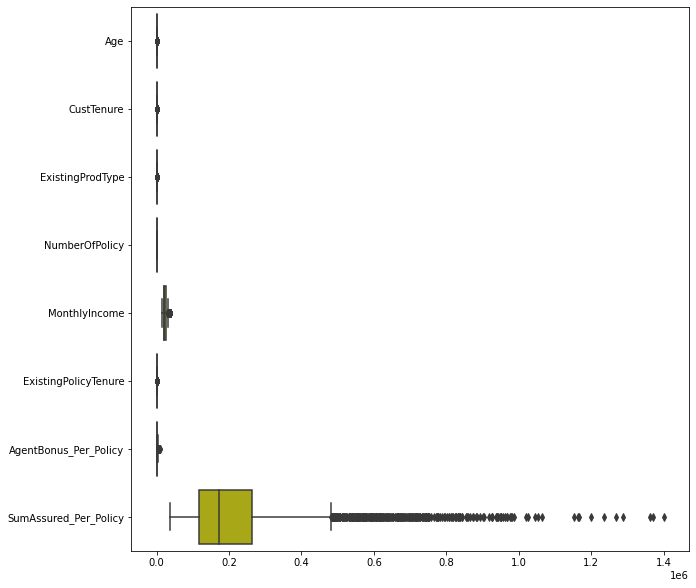

In [45]:
plt.figure(figsize=(10,10))
ax_box=sns.boxplot(data=df2, color='y', orient='h')


# Univariate Analysis

In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    4520 non-null   float64
 1   CustTenure             4520 non-null   float64
 2   Channel                4520 non-null   object 
 3   Occupation             4520 non-null   object 
 4   EducationField         4520 non-null   object 
 5   Gender                 4520 non-null   object 
 6   ExistingProdType       4520 non-null   int64  
 7   Designation            4520 non-null   object 
 8   NumberOfPolicy         4520 non-null   float64
 9   MaritalStatus          4520 non-null   object 
 10  MonthlyIncome          4520 non-null   float64
 11  ExistingPolicyTenure   4520 non-null   float64
 12  Zone                   4520 non-null   object 
 13  PaymentMethod          4520 non-null   object 
 14  AgentBonus_Per_Policy  4520 non-null   float64
 15  SumA

### Convert "MonthlyIncome" , "SumAssured" to Numeric Format

In [47]:
df2['MonthlyIncome'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0       20993.0
1       20130.0
2       17090.0
3       17909.0
4       18468.0
         ...   
4515    26355.0
4516    20991.0
4517    22892.6
4518    20068.0
4519    23820.0
Name: MonthlyIncome, Length: 4520, dtype: float64>

In [48]:
df2['MonthlyIncome'] = df2['MonthlyIncome'].astype(int)

In [49]:
df2['SumAssured_Per_Policy'] = df2['SumAssured_Per_Policy'].astype(int)

### Taking counts for each Categorical fields 

In [50]:
#Finding unique values for categorical variables
for column in df2.columns:
    if df2[column].dtype == 'object':
        print("Field name is ", column.upper(),': and Count for this categories are ',df2[column].nunique())
        print(df2[column].value_counts().sort_values())
        print('\n\n')
        

Field name is  CHANNEL : and Count for this categories are  3
Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64



Field name is  OCCUPATION : and Count for this categories are  5
Free Lancer           2
Laarge Business     153
Large Business      255
Small Business     1918
Salaried           2192
Name: Occupation, dtype: int64



Field name is  EDUCATIONFIELD : and Count for this categories are  7
MBA                 74
UG                 230
Post Graduate      252
Engineer           408
Diploma            496
Under Graduate    1190
Graduate          1870
Name: EducationField, dtype: int64



Field name is  GENDER : and Count for this categories are  3
Fe male     325
Female     1507
Male       2688
Name: Gender, dtype: int64



Field name is  DESIGNATION : and Count for this categories are  6
Exe                127
VP                 226
AVP                336
Senior Manager     676
Executive         1535
Manager         

### Merge similar categoriccal values as mentioned above in Insights 

In [51]:
print(df2.EducationField.value_counts())
print(df2.Gender.value_counts())
print(df2.Occupation.value_counts())
print(df2.Designation.value_counts())

Graduate          1870
Under Graduate    1190
Diploma            496
Engineer           408
Post Graduate      252
UG                 230
MBA                 74
Name: EducationField, dtype: int64
Male       2688
Female     1507
Fe male     325
Name: Gender, dtype: int64
Salaried           2192
Small Business     1918
Large Business      255
Laarge Business     153
Free Lancer           2
Name: Occupation, dtype: int64
Manager           1620
Executive         1535
Senior Manager     676
AVP                336
VP                 226
Exe                127
Name: Designation, dtype: int64


In [52]:
df2.EducationField = np.where(df2.EducationField=="UG","Under Graduate",df2.EducationField)
df2.Gender = np.where(df2.Gender=="Fe male","Female",df2.Gender)
df2.Occupation = np.where(df2.Occupation=="Laarge Business","Large Business",df2.Occupation)
df2.Designation = np.where(df2.Designation=="Exe","Executive",df2.Designation)

In [53]:
#Finding unique values for categorical variables
for column in df2.columns:
    if df2[column].dtype == 'object':
        print("Field name is ", column.upper(),': and Count for this categories are ',df2[column].nunique())
        print(df2[column].value_counts().sort_values())
        print('\n\n')

Field name is  CHANNEL : and Count for this categories are  3
Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64



Field name is  OCCUPATION : and Count for this categories are  4
Free Lancer          2
Large Business     408
Small Business    1918
Salaried          2192
Name: Occupation, dtype: int64



Field name is  EDUCATIONFIELD : and Count for this categories are  6
MBA                 74
Post Graduate      252
Engineer           408
Diploma            496
Under Graduate    1420
Graduate          1870
Name: EducationField, dtype: int64



Field name is  GENDER : and Count for this categories are  2
Female    1832
Male      2688
Name: Gender, dtype: int64



Field name is  DESIGNATION : and Count for this categories are  5
VP                 226
AVP                336
Senior Manager     676
Manager           1620
Executive         1662
Name: Designation, dtype: int64



Field name is  MARITALSTATUS : and Count for this 

Index(['Age', 'CustTenure', 'Channel', 'Occupation', 'EducationField',
       'Gender', 'ExistingProdType', 'Designation', 'NumberOfPolicy',
       'MaritalStatus', 'MonthlyIncome', 'ExistingPolicyTenure', 'Zone',
       'PaymentMethod', 'AgentBonus_Per_Policy', 'SumAssured_Per_Policy'],
      dtype='object')


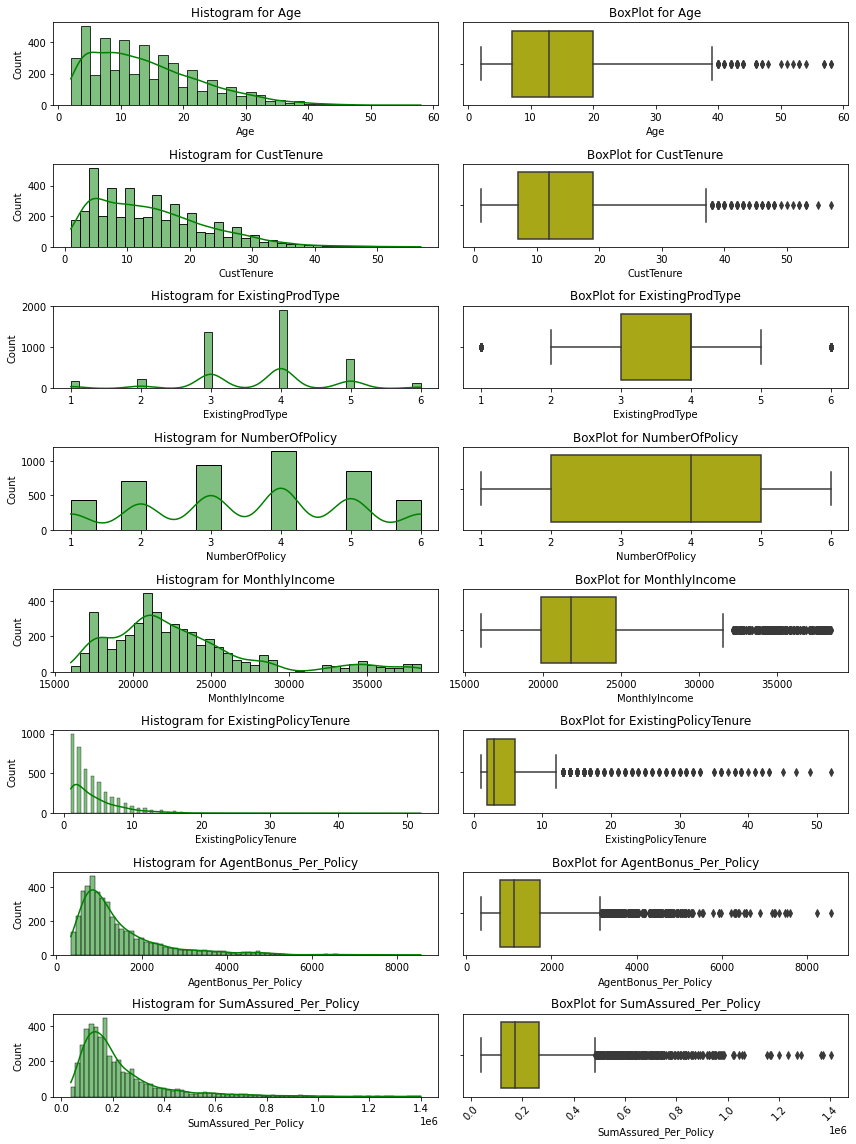

In [54]:
col_list=df2.columns
print(col_list)

fig, axes = plt.subplots(nrows=8,ncols=2)
fig.set_size_inches(12,16)
x=0
y=0
for i in df2.select_dtypes(include='number'):
        ax_hist=sns.histplot(x=df2[i], kde=True, ax=axes[x][y], color='g')
        ax_box=sns.boxplot(x=df2[i], data=df2, ax=axes[x][y+1], color='y')
        plt.xticks(rotation=45)
        ax_hist.set(xlabel=i,title='Histogram for '+i)
        ax_box.set(xlabel=i,title='BoxPlot for '+i)
        plt.tight_layout()
        x=x+1

In [55]:
##Check for Skewness of the data:
df2.skew()

Age                      0.960101
CustTenure               0.928995
ExistingProdType        -0.401100
NumberOfPolicy          -0.108161
MonthlyIncome            1.373508
ExistingPolicyTenure     3.440053
AgentBonus_Per_Policy    2.144651
SumAssured_Per_Policy    2.373659
dtype: float64

## Bivariate Analysis

#### Biveriate analysis of all other fields, with repect to Agent Bonus, and take Mean, Counts and Sum of Categorical fields

In [56]:
#Finding unique values for categorical variables
for column in df2.select_dtypes(include='object'):
    print("Field name is ", column.upper(),': and Distinct Count for this Column is ',df2[column].nunique())
    print("Field name is ", column.upper(),': and it\'s distinct  categories are ',df2[column].unique(), end='\n')
    print('Counts are each categories of this column are : \n',df2[column].value_counts().sort_values(),end='\n\n')
    print('Average AgentBonus for each categories of this Column are: ',df2.groupby(column)['AgentBonus_Per_Policy'].mean('AgentBonus_Per_Policy').sort_values(),end='\n\n')
    print('Total sum value of AgentBonus for each category for Column are : ',df2.groupby(column)['AgentBonus_Per_Policy'].sum('AgentBonus_Per_Policy').sort_values(),end='\n\n')
    print('\n\n')

Field name is  CHANNEL : and Distinct Count for this Column is  3
Field name is  CHANNEL : and it's distinct  categories are  ['Agent' 'Third Party Partner' 'Online']
Counts are each categories of this column are : 
 Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64

Average AgentBonus for each categories of this Column are:  Channel
Third Party Partner    1419.576690
Agent                  1453.390106
Online                 1456.468768
Name: AgentBonus_Per_Policy, dtype: float64

Total sum value of AgentBonus for each category for Column are :  Channel
Online                 6.816274e+05
Third Party Partner    1.217997e+06
Agent                  4.642128e+06
Name: AgentBonus_Per_Policy, dtype: float64




Field name is  OCCUPATION : and Distinct Count for this Column is  4
Field name is  OCCUPATION : and it's distinct  categories are  ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Counts are each categories of

Index(['Age', 'CustTenure', 'Channel', 'Occupation', 'EducationField',
       'Gender', 'ExistingProdType', 'Designation', 'NumberOfPolicy',
       'MaritalStatus', 'MonthlyIncome', 'ExistingPolicyTenure', 'Zone',
       'PaymentMethod', 'AgentBonus_Per_Policy', 'SumAssured_Per_Policy'],
      dtype='object')


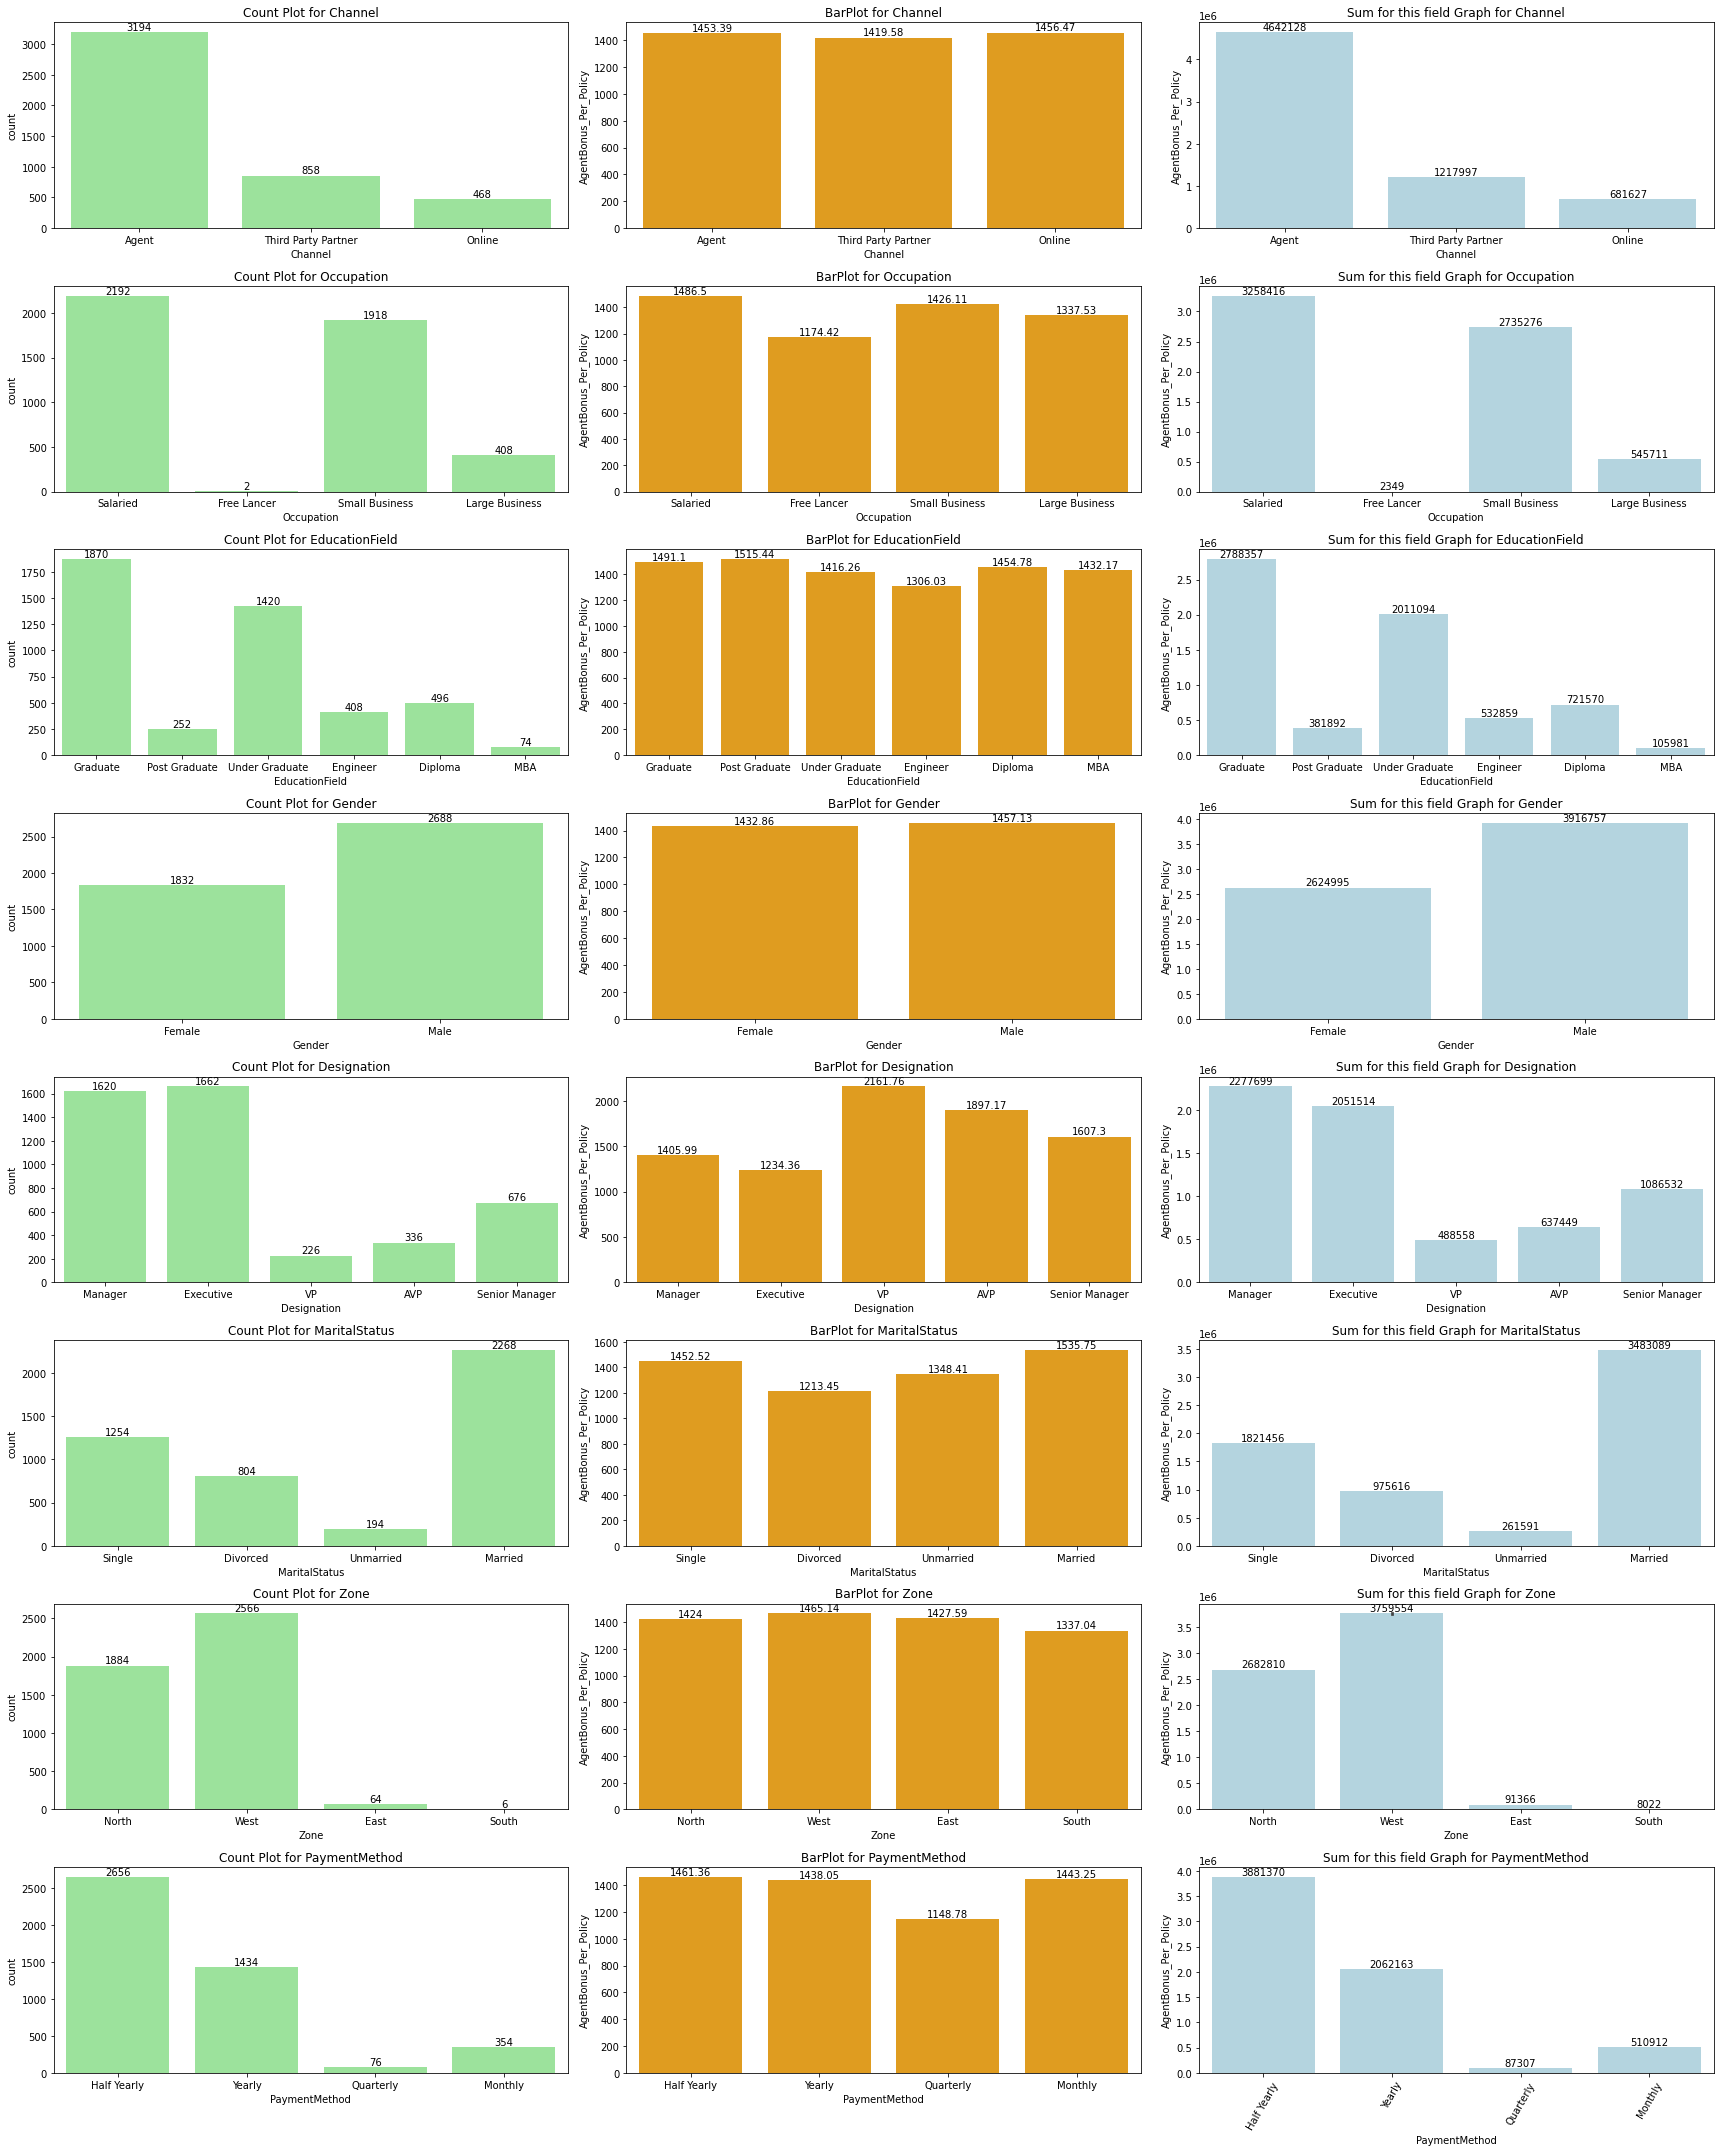

In [57]:
col_list=df2.columns
print(col_list)

fig, axes = plt.subplots(nrows=8,ncols=3)
fig.set_size_inches(24,30)
x=0
y=0
for i in df2.select_dtypes(include='object'):
        ax_count=sns.countplot(data=df2, ax=axes[x][y], x=i, color='lightgreen', orient='v' ) ##color='g'
        ax_count.set(xlabel=i,title='Count Plot for '+i)
        plt.xticks(rotation=60)
        for container in ax_count.containers:
            ax_count.bar_label(container)
        ax_bar=sns.barplot(data = df2, x=i, y='AgentBonus_Per_Policy', ax=axes[x][y+1] , color='orange', ci=0.1, orient='v')
        ax_bar.set(xlabel=i,title='BarPlot for '+i)
        plt.xticks(rotation=60)
        for container in ax_bar.containers:
            ax_bar.bar_label(container)
        ax_sum_var=sns.barplot(data = df2, x=i, y='AgentBonus_Per_Policy', ax=axes[x][y+2] , estimator=sum, color='lightblue', ci=0.1, orient='v')
        ax_sum_var.set(xlabel=i,title='Sum for this field Graph for '+i)
        plt.xticks(rotation=60)
        for container in ax_sum_var.containers:
            #ax_sum_var.bar_label(container)
            ax_sum_var.bar_label(ax_sum_var.containers[0], fmt='%.0f')
        plt.tight_layout()
        x=x+1

#### We have ploted Counts, Mean and Sum for Agent Bonus against each categorical field of sample data

## Multivariate Analysis

<Figure size 720x720 with 0 Axes>

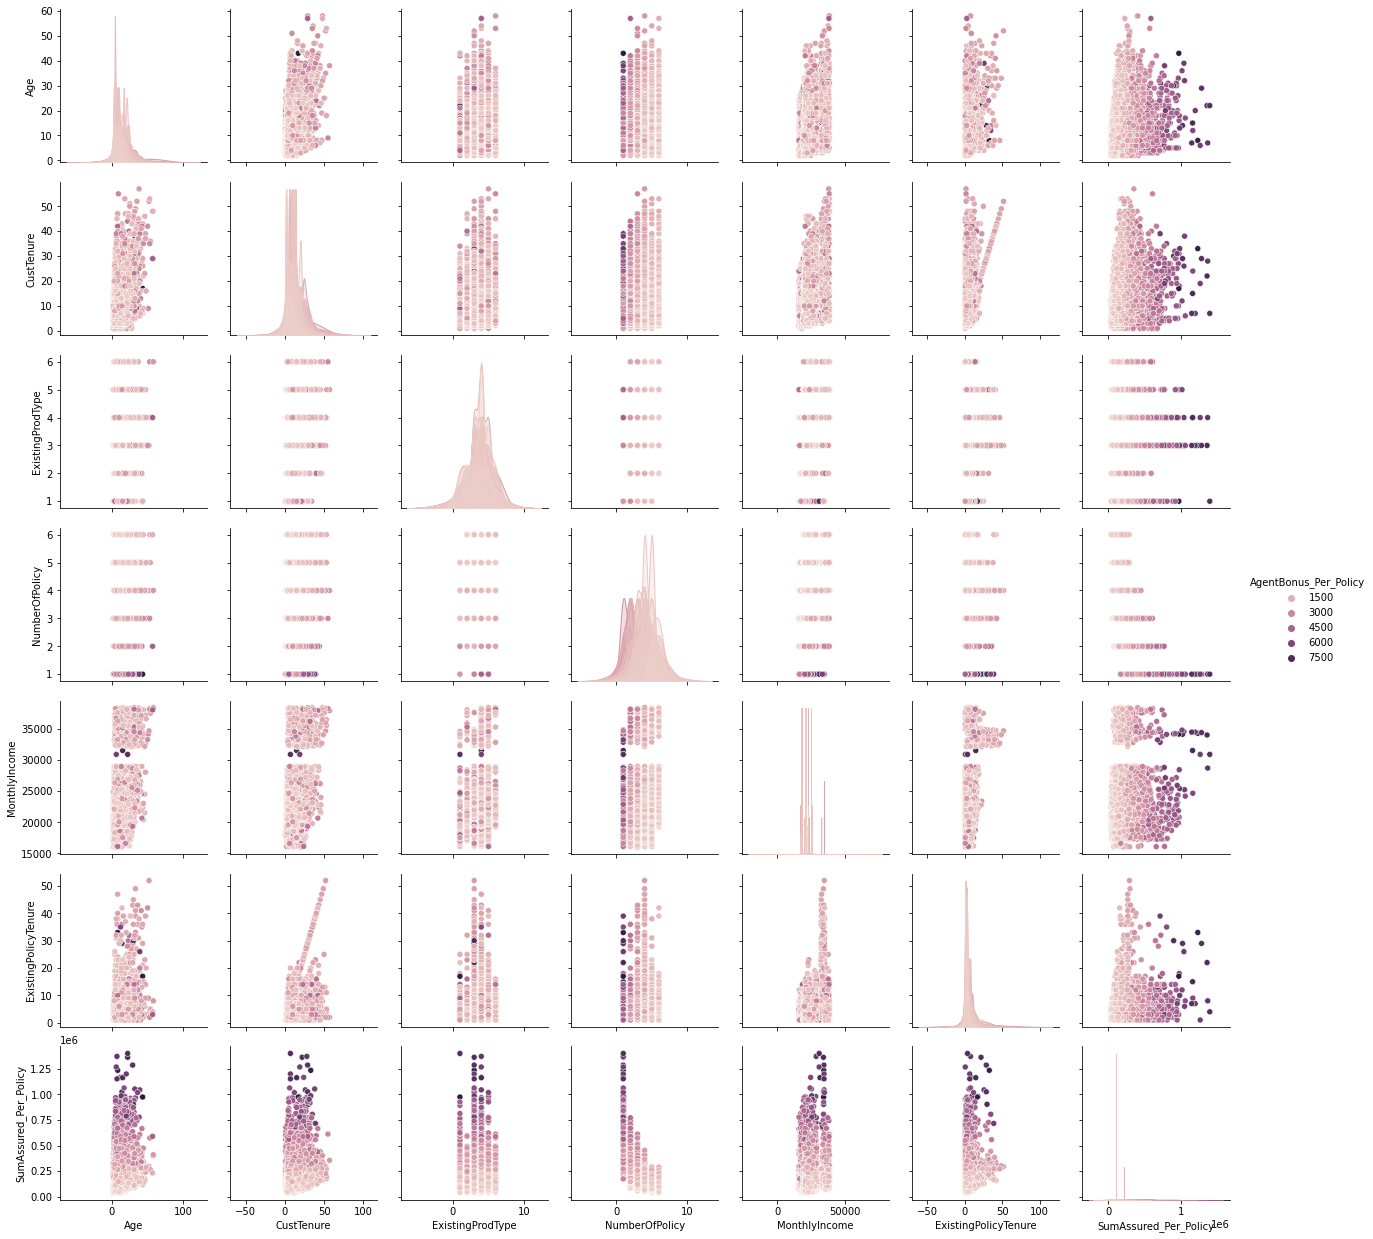

In [58]:
plt.figure(figsize=(10,10))
## sns.pairplot(data=df2, diag_kind='kde',hue = 'AgentBonus');
sns.pairplot(data=df2.select_dtypes(include='number'),  hue="AgentBonus_Per_Policy")

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'CustTenure'),
  Text(2.5, 0, 'ExistingProdType'),
  Text(3.5, 0, 'NumberOfPolicy'),
  Text(4.5, 0, 'MonthlyIncome'),
  Text(5.5, 0, 'ExistingPolicyTenure'),
  Text(6.5, 0, 'AgentBonus_Per_Policy'),
  Text(7.5, 0, 'SumAssured_Per_Policy')])

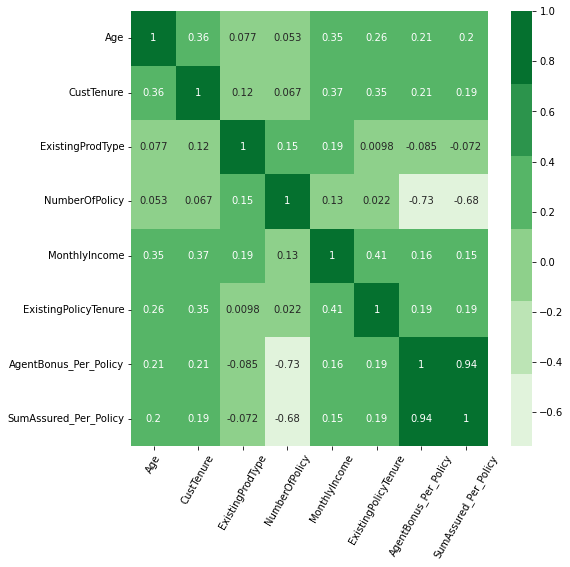

In [59]:
## Heat Map for all Numeric Fields
plt.figure(figsize=(8,8))
colormap = sns.color_palette("Greens")
sns.heatmap(df2.corr(),annot=True,cmap=colormap,);
plt.xticks(rotation=60)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Age'),
  Text(1.5, 0, 'CustTenure'),
  Text(2.5, 0, 'ExistingProdType'),
  Text(3.5, 0, 'NumberOfPolicy'),
  Text(4.5, 0, 'MonthlyIncome'),
  Text(5.5, 0, 'ExistingPolicyTenure'),
  Text(6.5, 0, 'AgentBonus_Per_Policy'),
  Text(7.5, 0, 'SumAssured_Per_Policy')])

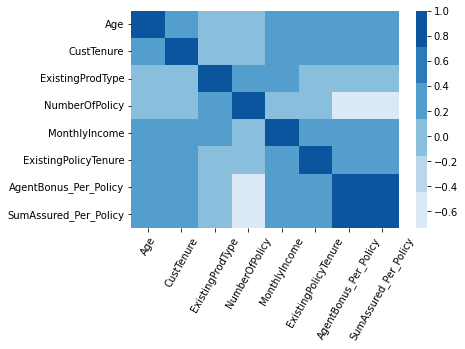

In [60]:
colormap = sns.color_palette("Blues")
sns.heatmap(df2.corr(), cmap=colormap)
plt.xticks(rotation=60)

In [61]:
df2.corr().T

,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,ExistingPolicyTenure,AgentBonus_Per_Policy,SumAssured_Per_Policy
Age,1.000000,0.359631,0.076609,0.053143,0.347942,0.263640,0.211933,0.197145
CustTenure,0.359631,1.000000,0.115561,0.066859,0.368522,0.347473,0.207415,0.193545
ExistingProdType,0.076609,0.115561,1.000000,0.149862,0.191194,0.009800,-0.085003,-0.072151
NumberOfPolicy,0.053143,0.066859,0.149862,1.000000,0.128328,0.021839,-0.733911,-0.683045
MonthlyIncome,0.347942,0.368522,0.191194,0.128328,1.000000,0.410641,0.163630,0.154269
ExistingPolicyTenure,0.263640,0.347473,0.009800,0.021839,0.410641,1.000000,0.188274,0.185564
AgentBonus_Per_Policy,0.211933,0.207415,-0.085003,-0.733911,0.163630,0.188274,1.000000,0.937796
SumAssured_Per_Policy,0.197145,0.193545,-0.072151,-0.683045,0.154269,0.185564,0.937796,1.000000


In [62]:
df2.groupby("NumberOfPolicy").Age.count()

NumberOfPolicy
1.0     438
2.0     711
3.0     939
4.0    1139
5.0     856
6.0     437
Name: Age, dtype: int64

In [63]:
df2.to_csv('C:\\Users\\Amit.Jain\\Desktop\\PGP-DSBA\\Capstone_Project\\LI_BFSI_01+-+Life+Insurance+Sales\\Sales_refined_data.csv')

In [64]:
df = pd.read_csv("Sales_refined_data.csv")
df.head()

,Unnamed: 0,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,ExistingPolicyTenure,Zone,PaymentMethod,AgentBonus_Per_Policy,SumAssured_Per_Policy
0,0,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993,2.0,North,Half Yearly,2204.500000,403380
1,1,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130,3.0,North,Yearly,553.500000,73625
2,2,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Executive,3.0,Unmarried,17090,2.0,North,Yearly,1424.333333,175994
3,3,11.0,2.0,Third Party Partner,Salaried,Graduate,Female,3,Executive,3.0,Divorced,17909,2.0,West,Half Yearly,597.000000,89545
4,4,6.0,4.0,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Divorced,18468,4.0,West,Half Yearly,738.750000,91601


In [65]:
df.drop('Unnamed: 0',inplace=True, axis=1)

In [66]:
df.shape

(4520, 16)

In [67]:
df.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,ExistingPolicyTenure,Zone,PaymentMethod,AgentBonus_Per_Policy,SumAssured_Per_Policy
0,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993,2.0,North,Half Yearly,2204.500000,403380
1,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130,3.0,North,Yearly,553.500000,73625
2,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Executive,3.0,Unmarried,17090,2.0,North,Yearly,1424.333333,175994
3,11.0,2.0,Third Party Partner,Salaried,Graduate,Female,3,Executive,3.0,Divorced,17909,2.0,West,Half Yearly,597.000000,89545
4,6.0,4.0,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Divorced,18468,4.0,West,Half Yearly,738.750000,91601


In [68]:
print("Data has ", df.shape[0]," rows and  ",df.shape[1]," columns ")

Data has  4520  rows and   16  columns 


In [69]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4520.0,14.253761,8.945607,2.000000,7.000,13.000000,20.00,58.0
CustTenure,4520.0,13.910398,9.088495,1.000000,7.000,12.000000,19.00,57.0
ExistingProdType,4520.0,3.688938,1.015769,1.000000,3.000,4.000000,4.00,6.0
NumberOfPolicy,4520.0,3.569690,1.449302,1.000000,2.000,4.000000,5.00,6.0
MonthlyIncome,4520.0,22912.542699,4777.830290,16009.000000,19850.000,21778.500000,24701.00,38456.0
ExistingPolicyTenure,4520.0,4.797788,5.150644,1.000000,2.000,3.000000,6.00,52.0
AgentBonus_Per_Policy,4520.0,1447.290306,1023.619093,341.666667,792.425,1117.333333,1737.25,8551.0
SumAssured_Per_Policy,4520.0,218463.407080,162075.165926,37268.000000,116203.250,172236.500000,262832.75,1400708.0


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    4520 non-null   float64
 1   CustTenure             4520 non-null   float64
 2   Channel                4520 non-null   object 
 3   Occupation             4520 non-null   object 
 4   EducationField         4520 non-null   object 
 5   Gender                 4520 non-null   object 
 6   ExistingProdType       4520 non-null   int64  
 7   Designation            4520 non-null   object 
 8   NumberOfPolicy         4520 non-null   float64
 9   MaritalStatus          4520 non-null   object 
 10  MonthlyIncome          4520 non-null   int64  
 11  ExistingPolicyTenure   4520 non-null   float64
 12  Zone                   4520 non-null   object 
 13  PaymentMethod          4520 non-null   object 
 14  AgentBonus_Per_Policy  4520 non-null   float64
 15  SumA

In [71]:
df.columns

Index(['Age', 'CustTenure', 'Channel', 'Occupation', 'EducationField',
       'Gender', 'ExistingProdType', 'Designation', 'NumberOfPolicy',
       'MaritalStatus', 'MonthlyIncome', 'ExistingPolicyTenure', 'Zone',
       'PaymentMethod', 'AgentBonus_Per_Policy', 'SumAssured_Per_Policy'],
      dtype='object')

In [72]:
#Checking Null Value
df.isnull().sum()

Age                      0
CustTenure               0
Channel                  0
Occupation               0
EducationField           0
Gender                   0
ExistingProdType         0
Designation              0
NumberOfPolicy           0
MaritalStatus            0
MonthlyIncome            0
ExistingPolicyTenure     0
Zone                     0
PaymentMethod            0
AgentBonus_Per_Policy    0
SumAssured_Per_Policy    0
dtype: int64

There are no NULL values in the any field

In [73]:
df.isnull().sum().sum()

0

In [74]:
df.size

72320

## Encode the data (having string values) for Modelling. 

## Split the data into train and test (70:30). Apply Linear regression using scikit learn. 

## Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

### Data Encoding:

In [75]:
df3=df.copy()

In [76]:
for col in df3.columns: 
    if df3[col].dtype == 'object': 
        print('\n')
        print('Columns is :',col)
        print(pd.Categorical(df3[col].unique()))
        print(pd.Categorical(df3[col].unique()).codes)
        df3[col] = pd.Categorical(df3[col]).codes



Columns is : Channel
['Agent', 'Third Party Partner', 'Online']
Categories (3, object): ['Agent', 'Online', 'Third Party Partner']
[0 2 1]


Columns is : Occupation
['Salaried', 'Free Lancer', 'Small Business', 'Large Business']
Categories (4, object): ['Free Lancer', 'Large Business', 'Salaried', 'Small Business']
[2 0 3 1]


Columns is : EducationField
['Graduate', 'Post Graduate', 'Under Graduate', 'Engineer', 'Diploma', 'MBA']
Categories (6, object): ['Diploma', 'Engineer', 'Graduate', 'MBA', 'Post Graduate', 'Under Graduate']
[2 4 5 1 0 3]


Columns is : Gender
['Female', 'Male']
Categories (2, object): ['Female', 'Male']
[0 1]


Columns is : Designation
['Manager', 'Executive', 'VP', 'AVP', 'Senior Manager']
Categories (5, object): ['AVP', 'Executive', 'Manager', 'Senior Manager', 'VP']
[2 1 4 0 3]


Columns is : MaritalStatus
['Single', 'Divorced', 'Unmarried', 'Married']
Categories (4, object): ['Divorced', 'Married', 'Single', 'Unmarried']
[2 0 3 1]


Columns is : Zone
['Nor

In [77]:
df3.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,ExistingPolicyTenure,Zone,PaymentMethod,AgentBonus_Per_Policy,SumAssured_Per_Policy
0,22.0,4.0,0,2,2,0,3,2,2.0,2,20993,2.0,1,0,2204.500000,403380
1,11.0,2.0,2,2,2,1,4,2,4.0,0,20130,3.0,1,3,553.500000,73625
2,26.0,4.0,0,0,4,1,4,1,3.0,3,17090,2.0,1,3,1424.333333,175994
3,11.0,2.0,2,2,2,0,3,1,3.0,0,17909,2.0,3,0,597.000000,89545
4,6.0,4.0,0,3,5,1,3,1,4.0,0,18468,4.0,3,0,738.750000,91601


In [78]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    4520 non-null   float64
 1   CustTenure             4520 non-null   float64
 2   Channel                4520 non-null   int8   
 3   Occupation             4520 non-null   int8   
 4   EducationField         4520 non-null   int8   
 5   Gender                 4520 non-null   int8   
 6   ExistingProdType       4520 non-null   int64  
 7   Designation            4520 non-null   int8   
 8   NumberOfPolicy         4520 non-null   float64
 9   MaritalStatus          4520 non-null   int8   
 10  MonthlyIncome          4520 non-null   int64  
 11  ExistingPolicyTenure   4520 non-null   float64
 12  Zone                   4520 non-null   int8   
 13  PaymentMethod          4520 non-null   int8   
 14  AgentBonus_Per_Policy  4520 non-null   float64
 15  SumA

In [79]:
df3.columns

Index(['Age', 'CustTenure', 'Channel', 'Occupation', 'EducationField',
       'Gender', 'ExistingProdType', 'Designation', 'NumberOfPolicy',
       'MaritalStatus', 'MonthlyIncome', 'ExistingPolicyTenure', 'Zone',
       'PaymentMethod', 'AgentBonus_Per_Policy', 'SumAssured_Per_Policy'],
      dtype='object')

### Data Split: Split the data into train and test (70:30)

In [80]:
## Create one more Duplicate data set , in case anything goes wrong while Splitting the data set
df_new=df3.copy()

In [81]:
df_new.drop('AgentBonus_Per_Policy', axis=1)

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,ExistingPolicyTenure,Zone,PaymentMethod,SumAssured_Per_Policy
0,22.0,4.0,0,2,2,0,3,2,2.0,2,20993,2.0,1,0,403380
1,11.0,2.0,2,2,2,1,4,2,4.0,0,20130,3.0,1,3,73625
2,26.0,4.0,0,0,4,1,4,1,3.0,3,17090,2.0,1,3,175994
3,11.0,2.0,2,2,2,0,3,1,3.0,0,17909,2.0,3,0,89545
4,6.0,4.0,0,3,5,1,3,1,4.0,0,18468,4.0,3,0,91601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,4.0,8.0,0,3,2,1,4,3,2.0,2,26355,2.0,3,3,318236
4516,9.0,9.0,0,2,5,0,2,1,2.0,1,20991,3.0,1,3,148406
4517,23.0,23.0,0,2,1,0,5,0,5.0,2,22892,2.0,1,0,133474
4518,10.0,10.0,1,3,2,0,4,1,2.0,2,20068,6.0,3,0,471999


In [82]:
X = df_new.drop('AgentBonus_Per_Policy', axis=1)
y = df_new[['AgentBonus_Per_Policy']]

In [83]:
X.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,ExistingPolicyTenure,Zone,PaymentMethod,SumAssured_Per_Policy
0,22.0,4.0,0,2,2,0,3,2,2.0,2,20993,2.0,1,0,403380
1,11.0,2.0,2,2,2,1,4,2,4.0,0,20130,3.0,1,3,73625
2,26.0,4.0,0,0,4,1,4,1,3.0,3,17090,2.0,1,3,175994
3,11.0,2.0,2,2,2,0,3,1,3.0,0,17909,2.0,3,0,89545
4,6.0,4.0,0,3,5,1,3,1,4.0,0,18468,4.0,3,0,91601


In [84]:
y.head()

,AgentBonus_Per_Policy
0,2204.500000
1,553.500000
2,1424.333333
3,597.000000
4,738.750000


In [85]:
#Train and test split of X and y in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [86]:
X_train.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,ExistingPolicyTenure,Zone,PaymentMethod,SumAssured_Per_Policy
2461,12.0,16.0,2,1,1,1,4,1,3.0,2,20742,4.0,3,0,160266
3681,31.0,15.0,0,3,5,1,4,2,5.0,1,23398,4.0,3,0,123541
1309,15.0,6.0,0,2,2,1,3,1,1.0,2,16232,6.0,1,0,453360
4254,5.0,16.0,1,1,1,1,4,2,2.0,1,23536,1.0,3,0,141098
1335,8.0,17.0,0,2,2,1,1,1,1.0,1,17269,6.0,3,1,750165


In [87]:
print('Shape for X_train is ',X_train.shape)
print('Shape for X_test is ',X_test.shape)
print('Shape for y_train is ',y_train.shape)
print('Shape for y_test is ',y_test.shape)

Shape for X_train is  (3164, 15)
Shape for X_test is  (1356, 15)
Shape for y_train is  (3164, 1)
Shape for y_test is  (1356, 1)


### SKLearn Linear Model

In [88]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [89]:
# As further deep dive, explore coefficients for each of the independent attributes
for id, col in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col, regression_model.coef_[0][id]))

The coefficient for Age is 4.789430368850247
The coefficient for CustTenure is 4.759701081772676
The coefficient for Channel is -8.882960541752864
The coefficient for Occupation is 7.510211001225475
The coefficient for EducationField is -5.507046975671935
The coefficient for Gender is 2.1343057926728486
The coefficient for ExistingProdType is -15.273396744099568
The coefficient for Designation is 4.737994566790387
The coefficient for NumberOfPolicy is -159.7092491616902
The coefficient for MaritalStatus is 14.788341883378328
The coefficient for MonthlyIncome is 0.008683193446440198
The coefficient for ExistingPolicyTenure is 2.6087386706276594
The coefficient for Zone is -5.627466691687209
The coefficient for PaymentMethod is 1.6127186348940015
The coefficient for SumAssured_Per_Policy is 0.004765571407328226


In [90]:
##Equation according to Learning regression First Model 
for id, col in enumerate(X_train.columns):
    print("{} * {}".format(col, regression_model.coef_[0][id]), end=' + ')
print(regression_model.intercept_[0])

Age * 4.789430368850247 + CustTenure * 4.759701081772676 + Channel * -8.882960541752864 + Occupation * 7.510211001225475 + EducationField * -5.507046975671935 + Gender * 2.1343057926728486 + ExistingProdType * -15.273396744099568 + Designation * 4.737994566790387 + NumberOfPolicy * -159.7092491616902 + MaritalStatus * 14.788341883378328 + MonthlyIncome * 0.008683193446440198 + ExistingPolicyTenure * 2.6087386706276594 + Zone * -5.627466691687209 + PaymentMethod * 1.6127186348940015 + SumAssured_Per_Policy * 0.004765571407328226 + 671.7150861205953


In [91]:
# Checking the intercept for the model
intercept = regression_model.intercept_[0]
print("The intercept for the model is {}".format(intercept))

print("Intercept is the point on Y Axis , when all values of X are Zero. basically when we say, what should be the value of Y when all params are Zero ")

The intercept for the model is 671.7150861205953
Intercept is the point on Y Axis , when all values of X are Zero. basically when we say, what should be the value of Y when all params are Zero 


In [92]:
# R square for training data
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.9067763446568196


In [93]:
# R square for test data
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.8964948926865645


In [94]:
#RMSE for Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
print("The Root Mean Square Error (RMSE) of the model is for Train data set is",np.sqrt(metrics.mean_squared_error(y_train,predicted_train)))

The Root Mean Square Error (RMSE) of the model is for Train data set is 317.48346002535106


In [95]:
linear_reg_train_rmse = np.sqrt(metrics.mean_squared_error(y_train,predicted_train))
linear_reg_train_rmse

317.48346002535106

In [96]:
#RMSE for Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(metrics.mean_squared_error(y_test,predicted_test)))

The Root Mean Square Error (RMSE) of the model is for testing set is 316.6349977188606


In [97]:
linear_reg_test_rmse = np.sqrt(metrics.mean_squared_error(y_test,predicted_test))
linear_reg_test_rmse

316.6349977188606

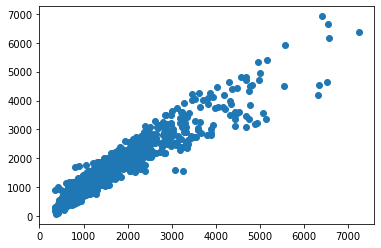

In [98]:
#mpg prediction
y_pred_test = regression_model.predict(X_test)
plt.scatter(y_test['AgentBonus_Per_Policy'], y_pred_test)

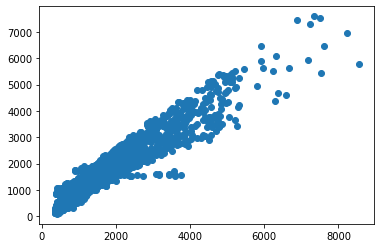

In [99]:
#mpg prediction
y_pred_train = regression_model.predict(X_train)
plt.scatter(y_train['AgentBonus_Per_Policy'], y_pred_train)

In [100]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,explained_variance_score,r2_score

In [101]:
# The MAE ( Mean asbsolute error)
print('The MAE is:', mean_absolute_error(y_train,y_pred_train))
linear_reg_train_MAE=mean_absolute_error(y_train,y_pred_train)
# The MSE ( Mean Squared Error)
print('The MSE is:', mean_squared_error(y_train,y_pred_train))
linear_reg_train_MSE=mean_squared_error(y_train,y_pred_train)
# The MAPE ( Mean Absolute Percentage Error)
print( 'The MAPE is', mean_absolute_percentage_error(y_train,y_pred_train))
linear_reg_train_MAPE=mean_absolute_percentage_error(y_train,y_pred_train)
# The EVS (Expalained Variance Score)
print('The EVS is', explained_variance_score(y_train,y_pred_train))
linear_reg_train_EVS=explained_variance_score(y_train,y_pred_train)

The MAE is: 220.32100694973653
The MSE is: 100795.7473896687
The MAPE is 0.1707241803718864
The EVS is 0.9067763446568196


In [102]:
# The MAE ( Mean asbsolute error)
print('The MAE for Test data is:', mean_absolute_error(y_test,y_pred_test))
linear_reg_test_MAE=mean_absolute_error(y_test,y_pred_test)
# The MSE ( Mean Squared Error)
print('The MSE for Test data is:', mean_squared_error(y_test,y_pred_test))
linear_reg_test_MSE=mean_squared_error(y_test,y_pred_test)
# The MAPE ( Mean Absolute Percentage Error)
print('The MAPE for Test data is', mean_absolute_percentage_error(y_test,y_pred_test))
linear_reg_test_MAPE=mean_absolute_percentage_error(y_test,y_pred_test)
# The EVS (Expalained Variance Score)
print('The EVS for Test data is', explained_variance_score(y_test,y_pred_test))
linear_reg_test_EVS=explained_variance_score(y_test,y_pred_test)

The MAE for Test data is: 222.5194900195983
The MSE for Test data is: 100257.72178042283
The MAPE for Test data is 0.17126532112977724
The EVS for Test data is 0.8964952272518002


In [103]:
index=['Train RMSE', 'Test RMSE','Train MAE', 'Test MAE', 'Train MSE', 'Test MSE', 
       'Train MAPE', 'Test MAPE', 'Train EVS', 'Test EVS' ]
final_result = pd.DataFrame({
        'Linear Regression':[linear_reg_train_rmse,linear_reg_test_rmse, linear_reg_train_MAE, linear_reg_test_MAE,
                             linear_reg_train_MSE, linear_reg_test_MSE, linear_reg_train_MAPE, linear_reg_test_MAPE,
                             linear_reg_train_EVS, linear_reg_test_EVS]
        },index=index)
final_result

,Linear Regression
Train RMSE,317.483460
Test RMSE,316.634998
Train MAE,220.321007
Test MAE,222.519490
Train MSE,100795.747390
Test MSE,100257.721780
Train MAPE,0.170724
Test MAPE,0.171265
Train EVS,0.906776
Test EVS,0.896495


### Building Stats Model

In [104]:
df_new.columns

Index(['Age', 'CustTenure', 'Channel', 'Occupation', 'EducationField',
       'Gender', 'ExistingProdType', 'Designation', 'NumberOfPolicy',
       'MaritalStatus', 'MonthlyIncome', 'ExistingPolicyTenure', 'Zone',
       'PaymentMethod', 'AgentBonus_Per_Policy', 'SumAssured_Per_Policy'],
      dtype='object')

In [105]:
data_train = pd.concat([X_train, y_train], axis = 1)
data_test = pd.concat([X_test, y_test], axis = 1)

In [106]:
data_train.columns

Index(['Age', 'CustTenure', 'Channel', 'Occupation', 'EducationField',
       'Gender', 'ExistingProdType', 'Designation', 'NumberOfPolicy',
       'MaritalStatus', 'MonthlyIncome', 'ExistingPolicyTenure', 'Zone',
       'PaymentMethod', 'SumAssured_Per_Policy', 'AgentBonus_Per_Policy'],
      dtype='object')

In [107]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3164 entries, 2461 to 235
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    3164 non-null   float64
 1   CustTenure             3164 non-null   float64
 2   Channel                3164 non-null   int8   
 3   Occupation             3164 non-null   int8   
 4   EducationField         3164 non-null   int8   
 5   Gender                 3164 non-null   int8   
 6   ExistingProdType       3164 non-null   int64  
 7   Designation            3164 non-null   int8   
 8   NumberOfPolicy         3164 non-null   float64
 9   MaritalStatus          3164 non-null   int8   
 10  MonthlyIncome          3164 non-null   int64  
 11  ExistingPolicyTenure   3164 non-null   float64
 12  Zone                   3164 non-null   int8   
 13  PaymentMethod          3164 non-null   int8   
 14  SumAssured_Per_Policy  3164 non-null   int64  
 15  Ag

In [108]:
f_1 = 'AgentBonus_Per_Policy~Age+CustTenure+Channel+Occupation+EducationField+Gender+ExistingProdType+Designation+NumberOfPolicy+MaritalStatus+MonthlyIncome+ExistingPolicyTenure+Zone+PaymentMethod+SumAssured_Per_Policy'

In [109]:
import statsmodels.formula.api as SM

In [110]:
lm1 = SM.ols(formula = f_1, data= data_train).fit()
lm1.params

Intercept                671.715086
Age                        4.789430
CustTenure                 4.759701
Channel                   -8.882961
Occupation                 7.510211
EducationField            -5.507047
Gender                     2.134306
ExistingProdType         -15.273397
Designation                4.737995
NumberOfPolicy          -159.709249
MaritalStatus             14.788342
MonthlyIncome              0.008683
ExistingPolicyTenure       2.608739
Zone                      -5.627467
PaymentMethod              1.612719
SumAssured_Per_Policy      0.004766
dtype: float64

In [111]:
print(lm1.summary())  

                              OLS Regression Results                             
Dep. Variable:     AgentBonus_Per_Policy   R-squared:                       0.907
Model:                               OLS   Adj. R-squared:                  0.906
Method:                    Least Squares   F-statistic:                     2041.
Date:                   Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                           08:27:52   Log-Likelihood:                -22716.
No. Observations:                   3164   AIC:                         4.546e+04
Df Residuals:                       3148   BIC:                         4.556e+04
Df Model:                             15                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Matrics for Stats Model on Train and Test data

In [112]:
import math

In [113]:
# Calculation of MSE for Test data set
test_mse = np.mean((lm1.predict(data_test.drop('AgentBonus_Per_Policy',axis=1))-data_test['AgentBonus_Per_Policy'])**2)
test_mse

100257.72178042427

In [114]:
#Root Mean Squared Error
print('test data root mean square error value is : '+ str(np.sqrt(test_mse)))

test data root mean square error value is : 316.63499771886285


In [115]:
# Calculation of MSE for Train data set
train_mse = np.mean((lm1.predict(data_train.drop('AgentBonus_Per_Policy',axis=1))-data_train['AgentBonus_Per_Policy'])**2)
train_mse

100795.74738966835

In [116]:
#Root Mean Squared Error
print('Train data root mean square error value is : '+ str(np.sqrt(train_mse)))

Train data root mean square error value is : 317.48346002535055


test data root mean square error value is : 316.63499771886285
Train data root mean square error value is : 317.48346002535055
Equation for model is :
(671.72) * Intercept + (4.79) * Age + (4.76) * CustTenure + (-8.88) * Channel + (7.51) * Occupation + (-5.51) * EducationField + (2.13) * Gender + (-15.27) * ExistingProdType + (4.74) * Designation + (-159.71) * NumberOfPolicy + (14.79) * MaritalStatus + (0.01) * MonthlyIncome + (2.61) * ExistingPolicyTenure + (-5.63) * Zone + (1.61) * PaymentMethod + (0.0) * SumAssured_Per_Policy + 

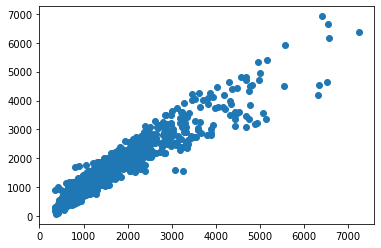

In [117]:
# Calculation of MSE for Test data set
test_mse_1 = np.mean((lm1.predict(data_test.drop('AgentBonus_Per_Policy',axis=1))-data_test['AgentBonus_Per_Policy'])**2)
test_mse_1
#Root Mean Squared Error
print('test data root mean square error value is : '+ str(np.sqrt(test_mse_1)))
# Calculation of MSE
train_mse_1 = np.mean((lm1.predict(data_train.drop('AgentBonus_Per_Policy',axis=1))-data_train['AgentBonus_Per_Policy'])**2)
train_mse_1
#Root Mean Squared Error
print('Train data root mean square error value is : '+ str(np.sqrt(train_mse_1)))
print('Equation for model is :')
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')
    
# Prediction on Test data
y_pred_1 = lm1.predict(data_test)
plt.scatter(y_test['AgentBonus_Per_Policy'], y_pred_1)
plt.show()

train_rmse_1=str(np.sqrt(train_mse_1))
test_rmse_1=str(np.sqrt(test_mse_1))

In [118]:
y_test_predict = lm1.predict(data_test)
y_train_predict = lm1.predict(data_train)

In [119]:
y_train_predict.head()

2461    1223.226781
3681     838.802518
1309    2918.530636
4254    1273.330784
1335    4366.927465
dtype: float64

In [120]:
from statsmodels.iolib.summary import Summary

y_test_predict = lm1.predict(data_test)
y_train_predict = lm1.predict(data_train)

# The MAE ( Mean asbsolute error)
print('The MAE is:', mean_absolute_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_1_train_MAE=mean_absolute_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The MSE ( Mean Squared Error)
print('The MSE is:', mean_squared_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_1_train_MSE=mean_squared_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The MAPE ( Mean Absolute Percentage Error)
print( 'The MAPE is', mean_absolute_percentage_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_1_train_MAPE=mean_absolute_percentage_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The EVS (Expalained Variance Score)
print('The EVS is', explained_variance_score(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_1_train_EVS=explained_variance_score(data_train['AgentBonus_Per_Policy'],y_train_predict)

# The MAE ( Mean asbsolute error)
print('The MAE for Test data is:', mean_absolute_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_1_test_MAE=mean_absolute_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The MSE ( Mean Squared Error)
print('The MSE for Test data is:', mean_squared_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_1_test_MSE=mean_squared_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The MAPE ( Mean Absolute Percentage Error)
print('The MAPE for Test data is', mean_absolute_percentage_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_1_test_MAPE=mean_absolute_percentage_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The EVS (Expalained Variance Score)
print('The EVS for Test data is', explained_variance_score(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_1_test_EVS=explained_variance_score(data_test['AgentBonus_Per_Policy'],y_test_predict)

The MAE is: 220.32100694970435
The MSE is: 100795.74738966869
The MAPE is 0.17072418037186507
The EVS is 0.9067763446568196
The MAE for Test data is: 222.5194900195671
The MSE for Test data is: 100257.7217804241
The MAPE for Test data is 0.17126532112975362
The EVS for Test data is 0.8964952272517993


In [121]:
data2= pd.DataFrame({
        'Stats Model 1':[train_rmse_1,test_rmse_1, Stats_model_1_train_MAE, Stats_model_1_test_MAE,
                  Stats_model_1_train_MSE, Stats_model_1_test_MSE, Stats_model_1_train_MAPE, Stats_model_1_test_MAPE,
                  Stats_model_1_train_EVS, Stats_model_1_test_EVS]
        },index=index)

final_result=pd.concat([final_result,data2],axis=1)
final_result

,Linear Regression,Stats Model 1
Train RMSE,317.483460,317.48346002535055
Test RMSE,316.634998,316.63499771886285
Train MAE,220.321007,220.321007
Test MAE,222.519490,222.51949
Train MSE,100795.747390,100795.74739
Test MSE,100257.721780,100257.72178
Train MAPE,0.170724,0.170724
Test MAPE,0.171265,0.171265
Train EVS,0.906776,0.906776
Test EVS,0.896495,0.896495


### Iteration: 2

#### We can see Lot of Fields have P value as more than 0.05, so we need to iliminate them , before we go further.
#### Also to Notice, since we have lot of fields, we can not go and check for each single columns,
#### So lets check VIF in Loop and find the best features according to VIF
#### For this testing we will keep VIF thresold value as 5

In [122]:
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_vif = data_train.iloc[:,1:]
y = data_train['AgentBonus_Per_Policy']

In [123]:
thres = 5

while True:
    Cols = range(x_vif.shape[1])
    
    vif = np.array([variance_inflation_factor(x_vif.values, i) for i in Cols])
    if all(vif < thres):
        break
    else:
        Cols = np.delete(Cols,np.argmax(vif))
        x_vif = x_vif.iloc[:,Cols]

In [124]:
len(x_vif.columns)

10

In [125]:
x_vif.columns

Index(['CustTenure', 'Channel', 'EducationField', 'Gender', 'Designation',
       'MaritalStatus', 'ExistingPolicyTenure', 'Zone', 'PaymentMethod',
       'SumAssured_Per_Policy'],
      dtype='object')

In [126]:
vif = [variance_inflation_factor(x_vif.values, ix) for ix in range(x_vif.shape[1])]

In [127]:
i=0
for column in x_vif.columns:
    if i < len(x_vif.columns):
        print ('VIF for ',column ,"-->",  vif[i])
        i = i+1

VIF for  CustTenure --> 3.7649121302806456
VIF for  Channel --> 1.351814184733024
VIF for  EducationField --> 3.013828674898219
VIF for  Gender --> 2.23880673655966
VIF for  Designation --> 3.6622884417664836
VIF for  MaritalStatus --> 2.9365604234253677
VIF for  ExistingPolicyTenure --> 2.182083152055937
VIF for  Zone --> 4.306208853382339
VIF for  PaymentMethod --> 1.5613624945213813
VIF for  SumAssured_Per_Policy --> 2.890013748992411


In [128]:
f_2 = 'AgentBonus_Per_Policy~CustTenure+Channel+EducationField+Gender+Designation+MaritalStatus+ExistingPolicyTenure+Zone+PaymentMethod+SumAssured_Per_Policy'

In [129]:
lm2 = SM.ols(formula= f_2, data = data_train).fit()
lm2.params

Intercept                97.578366
CustTenure                2.490252
Channel                  -5.525502
EducationField           -3.716762
Gender                   12.087670
Designation               9.399802
MaritalStatus            16.199391
ExistingPolicyTenure      2.282474
Zone                      1.504290
PaymentMethod            -5.626124
SumAssured_Per_Policy     0.005840
dtype: float64

In [130]:
print(lm2.summary()) 

                              OLS Regression Results                             
Dep. Variable:     AgentBonus_Per_Policy   R-squared:                       0.884
Model:                               OLS   Adj. R-squared:                  0.883
Method:                    Least Squares   F-statistic:                     2397.
Date:                   Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                           08:27:54   Log-Likelihood:                -23065.
No. Observations:                   3164   AIC:                         4.615e+04
Df Residuals:                       3153   BIC:                         4.622e+04
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


test data root mean square error value is : 353.56277958413546
Train data root mean square error value is : 354.54396801961036
Equation for model is :
(97.58) * Intercept + (2.49) * CustTenure + (-5.53) * Channel + (-3.72) * EducationField + (12.09) * Gender + (9.4) * Designation + (16.2) * MaritalStatus + (2.28) * ExistingPolicyTenure + (1.5) * Zone + (-5.63) * PaymentMethod + (0.01) * SumAssured_Per_Policy + 

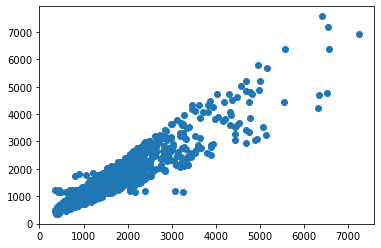

In [131]:
# Calculation of MSE for Test data set
test_mse_2 = np.mean((lm2.predict(data_test.drop('AgentBonus_Per_Policy',axis=1))-data_test['AgentBonus_Per_Policy'])**2)
test_mse_2
#Root Mean Squared Error
print('test data root mean square error value is : '+ str(np.sqrt(test_mse_2)))
# Calculation of MSE
train_mse_2 = np.mean((lm2.predict(data_train.drop('AgentBonus_Per_Policy',axis=1))-data_train['AgentBonus_Per_Policy'])**2)
train_mse_2
#Root Mean Squared Error
print('Train data root mean square error value is : '+ str(np.sqrt(train_mse_2)))
print('Equation for model is :')
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')
    
# Prediction on Test data
y_pred_2 = lm2.predict(data_test)
plt.scatter(y_test['AgentBonus_Per_Policy'], y_pred_2)
plt.show()

train_rmse_2=str(np.sqrt(train_mse_2))
test_rmse_2=str(np.sqrt(test_mse_2))

In [132]:
from statsmodels.iolib.summary import Summary

y_test_predict = lm2.predict(data_test)
y_train_predict = lm2.predict(data_train)

# The MAE ( Mean asbsolute error)
print('The MAE is:', mean_absolute_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_2_train_MAE=mean_absolute_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The MSE ( Mean Squared Error)
print('The MSE is:', mean_squared_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_2_train_MSE=mean_squared_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The MAPE ( Mean Absolute Percentage Error)
print( 'The MAPE is', mean_absolute_percentage_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_2_train_MAPE=mean_absolute_percentage_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The EVS (Expalained Variance Score)
print('The EVS is', explained_variance_score(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_2_train_EVS=explained_variance_score(data_train['AgentBonus_Per_Policy'],y_train_predict)

# The MAE ( Mean asbsolute error)
print('The MAE for Test data is:', mean_absolute_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_2_test_MAE=mean_absolute_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The MSE ( Mean Squared Error)
print('The MSE for Test data is:', mean_squared_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_2_test_MSE=mean_squared_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The MAPE ( Mean Absolute Percentage Error)
print('The MAPE for Test data is', mean_absolute_percentage_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_2_test_MAPE=mean_absolute_percentage_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The EVS (Expalained Variance Score)
print('The EVS for Test data is', explained_variance_score(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_2_test_EVS=explained_variance_score(data_test['AgentBonus_Per_Policy'],y_test_predict)

The MAE is: 238.54187545716903
The MSE is: 125701.42525909047
The MAPE is 0.17557448996078645
The EVS is 0.8837416592666577
The MAE for Test data is: 244.14186309381338
The MSE for Test data is: 125006.63910726018
The MAPE for Test data is 0.1796778764535846
The EVS for Test data is 0.8709648906909357


In [133]:
data2= pd.DataFrame({
        'Stats Model 2 ':[train_rmse_2,test_rmse_2, Stats_model_2_train_MAE, Stats_model_2_test_MAE,
                  Stats_model_2_train_MSE, Stats_model_2_test_MSE, Stats_model_2_train_MAPE, Stats_model_2_test_MAPE,
                  Stats_model_2_train_EVS, Stats_model_2_test_EVS],
        },index=index)

final_result=pd.concat([final_result,data2],axis=1)
final_result

,Linear Regression,Stats Model 1,Stats Model 2
Train RMSE,317.483460,317.48346002535055,354.54396801961036
Test RMSE,316.634998,316.63499771886285,353.56277958413546
Train MAE,220.321007,220.321007,238.541875
Test MAE,222.519490,222.51949,244.141863
Train MSE,100795.747390,100795.74739,125701.425259
Test MSE,100257.721780,100257.72178,125006.639107
Train MAPE,0.170724,0.170724,0.175574
Test MAPE,0.171265,0.171265,0.179678
Train EVS,0.906776,0.906776,0.883742
Test EVS,0.896495,0.896495,0.870965


### Iteration 3:

### Since P value is more than 0.05 for many fields, lets remove one by one fields, starting with Highest value of "Zone" and regenerate our OLS Model

In [134]:
f_3 = 'AgentBonus_Per_Policy~CustTenure+Channel+EducationField+Gender+Designation+MaritalStatus+ExistingPolicyTenure+PaymentMethod+SumAssured_Per_Policy'

In [135]:
lm3 = SM.ols(formula= f_3, data = data_train).fit()
lm3.params

Intercept                100.461627
CustTenure                 2.490329
Channel                   -5.523962
EducationField            -3.719381
Gender                    12.166105
Designation                9.404058
MaritalStatus             16.298665
ExistingPolicyTenure       2.290047
PaymentMethod             -5.591462
SumAssured_Per_Policy      0.005840
dtype: float64

In [136]:
print(lm3.summary()) 

                              OLS Regression Results                             
Dep. Variable:     AgentBonus_Per_Policy   R-squared:                       0.884
Model:                               OLS   Adj. R-squared:                  0.883
Method:                    Least Squares   F-statistic:                     2664.
Date:                   Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                           08:27:54   Log-Likelihood:                -23065.
No. Observations:                   3164   AIC:                         4.615e+04
Df Residuals:                       3154   BIC:                         4.621e+04
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


test data root mean square error value is : 353.5568690941128
Train data root mean square error value is : 354.5472293235076
Equation for model is :
(100.462) * Intercept + (2.49) * CustTenure + (-5.524) * Channel + (-3.719) * EducationField + (12.166) * Gender + (9.404) * Designation + (16.299) * MaritalStatus + (2.29) * ExistingPolicyTenure + (-5.591) * PaymentMethod + (0.006) * SumAssured_Per_Policy + 

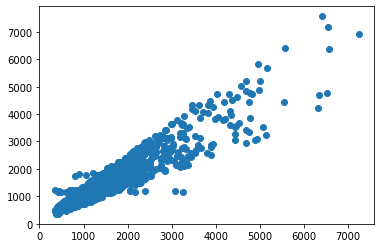

In [137]:
# Calculation of MSE for Test data set
test_mse_3 = np.mean((lm3.predict(data_test.drop('AgentBonus_Per_Policy',axis=1))-data_test['AgentBonus_Per_Policy'])**2)
test_mse_3
#Root Mean Squared Error
print('test data root mean square error value is : '+ str(np.sqrt(test_mse_3)))
# Calculation of MSE
train_mse_3 = np.mean((lm3.predict(data_train.drop('AgentBonus_Per_Policy',axis=1))-data_train['AgentBonus_Per_Policy'])**2)
train_mse_3
#Root Mean Squared Error
print('Train data root mean square error value is : '+ str(np.sqrt(train_mse_3)))
print('Equation for model is :')
for i,j in np.array(lm3.params.reset_index()):
    print('({}) * {} +'.format(round(j,3),i),end=' ')
    
# Prediction on Test data
y_pred_3 = lm3.predict(data_test)
plt.scatter(y_test['AgentBonus_Per_Policy'], y_pred_3)
plt.show()

train_rmse_3=str(np.sqrt(train_mse_3))
test_rmse_3=str(np.sqrt(test_mse_3))

In [138]:
from statsmodels.iolib.summary import Summary

y_test_predict = lm3.predict(data_test)
y_train_predict = lm3.predict(data_train)

# The MAE ( Mean asbsolute error)
print('The MAE is:', mean_absolute_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_3_train_MAE=mean_absolute_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The MSE ( Mean Squared Error)
print('The MSE is:', mean_squared_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_3_train_MSE=mean_squared_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The MAPE ( Mean Absolute Percentage Error)
print( 'The MAPE is', mean_absolute_percentage_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_3_train_MAPE=mean_absolute_percentage_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The EVS (Expalained Variance Score)
print('The EVS is', explained_variance_score(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_3_train_EVS=explained_variance_score(data_train['AgentBonus_Per_Policy'],y_train_predict)

# The MAE ( Mean asbsolute error)
print('The MAE for Test data is:', mean_absolute_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_3_test_MAE=mean_absolute_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The MSE ( Mean Squared Error)
print('The MSE for Test data is:', mean_squared_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_3_test_MSE=mean_squared_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The MAPE ( Mean Absolute Percentage Error)
print('The MAPE for Test data is', mean_absolute_percentage_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_3_test_MAPE=mean_absolute_percentage_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The EVS (Expalained Variance Score)
print('The EVS for Test data is', explained_variance_score(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_3_test_EVS=explained_variance_score(data_test['AgentBonus_Per_Policy'],y_test_predict)

The MAE is: 238.57165587935674
The MSE is: 125703.73782097614
The MAPE is 0.17563317075152907
The EVS is 0.8837395204316595
The MAE for Test data is: 244.15099412646188
The MSE for Test data is: 125002.45968363168
The MAPE for Test data is 0.17968073900944037
The EVS for Test data is 0.8709697185134511


In [139]:
data2= pd.DataFrame({
        'Stats Model 3 ':[train_rmse_3,test_rmse_3, Stats_model_3_train_MAE, Stats_model_3_test_MAE,
                  Stats_model_3_train_MSE, Stats_model_3_test_MSE, Stats_model_3_train_MAPE, Stats_model_3_test_MAPE,
                  Stats_model_3_train_EVS, Stats_model_3_test_EVS],
        },index=index)

final_result=pd.concat([final_result,data2],axis=1)
final_result

,Linear Regression,Stats Model 1,Stats Model 2,Stats Model 3
Train RMSE,317.483460,317.48346002535055,354.54396801961036,354.5472293235076
Test RMSE,316.634998,316.63499771886285,353.56277958413546,353.5568690941128
Train MAE,220.321007,220.321007,238.541875,238.571656
Test MAE,222.519490,222.51949,244.141863,244.150994
Train MSE,100795.747390,100795.74739,125701.425259,125703.737821
Test MSE,100257.721780,100257.72178,125006.639107,125002.459684
Train MAPE,0.170724,0.170724,0.175574,0.175633
Test MAPE,0.171265,0.171265,0.179678,0.179681
Train EVS,0.906776,0.906776,0.883742,0.88374
Test EVS,0.896495,0.896495,0.870965,0.87097


### Iteration 4
### Lets remove "Channel"  field , because it hass P value as 0.9 , which is far away from 0.05

In [140]:
f_4 = 'AgentBonus_Per_Policy~CustTenure+EducationField+Gender+Designation+MaritalStatus+ExistingPolicyTenure+PaymentMethod+SumAssured_Per_Policy'

In [141]:
lm4 = SM.ols(formula= f_4, data = data_train).fit()
lm4.params

Intercept                97.920459
CustTenure                2.491906
EducationField           -3.786913
Gender                   12.329679
Designation               9.352201
MaritalStatus            16.125581
ExistingPolicyTenure      2.318545
PaymentMethod            -5.545362
SumAssured_Per_Policy     0.005840
dtype: float64

In [142]:
print(lm4.summary()) 

                              OLS Regression Results                             
Dep. Variable:     AgentBonus_Per_Policy   R-squared:                       0.884
Model:                               OLS   Adj. R-squared:                  0.883
Method:                    Least Squares   F-statistic:                     2997.
Date:                   Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                           08:27:55   Log-Likelihood:                -23065.
No. Observations:                   3164   AIC:                         4.615e+04
Df Residuals:                       3155   BIC:                         4.620e+04
Df Model:                              8                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


test data root mean square error value is : 353.35723000116565
Train data root mean square error value is : 354.57408724890837
Equation for model is :
(97.9205) * Intercept + (2.4919) * CustTenure + (-3.7869) * EducationField + (12.3297) * Gender + (9.3522) * Designation + (16.1256) * MaritalStatus + (2.3185) * ExistingPolicyTenure + (-5.5454) * PaymentMethod + (0.0058) * SumAssured_Per_Policy + 

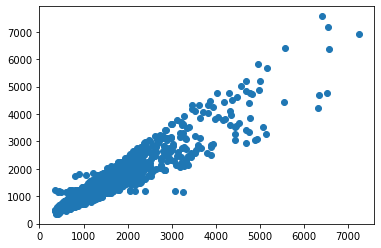

In [143]:
# Calculation of MSE for Test data set
test_mse_4 = np.mean((lm4.predict(data_test.drop('AgentBonus_Per_Policy',axis=1))-data_test['AgentBonus_Per_Policy'])**2)
test_mse_4
#Root Mean Squared Error
print('test data root mean square error value is : '+ str(np.sqrt(test_mse_4)))
# Calculation of MSE
train_mse_4 = np.mean((lm4.predict(data_train.drop('AgentBonus_Per_Policy',axis=1))-data_train['AgentBonus_Per_Policy'])**2)
train_mse_4
#Root Mean Squared Error
print('Train data root mean square error value is : '+ str(np.sqrt(train_mse_4)))
print('Equation for model is :')
for i,j in np.array(lm4.params.reset_index()):
    print('({}) * {} +'.format(round(j,4),i),end=' ')
    
# Prediction on Test data
y_pred_4 = lm4.predict(data_test)
plt.scatter(y_test['AgentBonus_Per_Policy'], y_pred_4)
plt.show()

train_rmse_4=str(np.sqrt(train_mse_4))
test_rmse_4=str(np.sqrt(test_mse_4))

In [144]:
from statsmodels.iolib.summary import Summary

y_test_predict = lm4.predict(data_test)
y_train_predict = lm4.predict(data_train)

# The MAE ( Mean asbsolute error)
print('The MAE is:', mean_absolute_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_4_train_MAE=mean_absolute_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The MSE ( Mean Squared Error)
print('The MSE is:', mean_squared_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_4_train_MSE=mean_squared_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The MAPE ( Mean Absolute Percentage Error)
print( 'The MAPE is', mean_absolute_percentage_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_4_train_MAPE=mean_absolute_percentage_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The EVS (Expalained Variance Score)
print('The EVS is', explained_variance_score(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_4_train_EVS=explained_variance_score(data_train['AgentBonus_Per_Policy'],y_train_predict)

# The MAE ( Mean asbsolute error)
print('The MAE for Test data is:', mean_absolute_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_4_test_MAE=mean_absolute_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The MSE ( Mean Squared Error)
print('The MSE for Test data is:', mean_squared_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_4_test_MSE=mean_squared_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The MAPE ( Mean Absolute Percentage Error)
print('The MAPE for Test data is', mean_absolute_percentage_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_4_test_MAPE=mean_absolute_percentage_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The EVS (Expalained Variance Score)
print('The EVS for Test data is', explained_variance_score(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_4_test_EVS=explained_variance_score(data_test['AgentBonus_Per_Policy'],y_test_predict)

The MAE is: 238.55919373330045
The MSE is: 125722.78334839644
The MAPE is 0.17561937166199826
The EVS is 0.8837219056638737
The MAE for Test data is: 244.03109511037852
The MSE for Test data is: 124861.33199409649
The MAPE for Test data is 0.17964972615359148
The EVS for Test data is 0.8711154406531745


In [145]:
data2= pd.DataFrame({
        'Stats Model 4 ':[train_rmse_4,test_rmse_4, Stats_model_4_train_MAE, Stats_model_4_test_MAE,
                  Stats_model_4_train_MSE, Stats_model_4_test_MSE, Stats_model_4_train_MAPE, Stats_model_4_test_MAPE,
                  Stats_model_4_train_EVS, Stats_model_4_test_EVS],
        },index=index)

final_result=pd.concat([final_result,data2],axis=1)
final_result

,Linear Regression,Stats Model 1,Stats Model 2,Stats Model 3,Stats Model 4
Train RMSE,317.483460,317.48346002535055,354.54396801961036,354.5472293235076,354.57408724890837
Test RMSE,316.634998,316.63499771886285,353.56277958413546,353.5568690941128,353.35723000116565
Train MAE,220.321007,220.321007,238.541875,238.571656,238.559194
Test MAE,222.519490,222.51949,244.141863,244.150994,244.031095
Train MSE,100795.747390,100795.74739,125701.425259,125703.737821,125722.783348
Test MSE,100257.721780,100257.72178,125006.639107,125002.459684,124861.331994
Train MAPE,0.170724,0.170724,0.175574,0.175633,0.175619
Test MAPE,0.171265,0.171265,0.179678,0.179681,0.17965
Train EVS,0.906776,0.906776,0.883742,0.88374,0.883722
Test EVS,0.896495,0.896495,0.870965,0.87097,0.871115


### Iteration 5:
### Lets remove "Gender"  this time and try again

In [146]:
f_5 = 'AgentBonus_Per_Policy~CustTenure+EducationField+Designation+MaritalStatus+ExistingPolicyTenure+PaymentMethod+SumAssured_Per_Policy'

In [147]:
lm5 = SM.ols(formula= f_5, data = data_train).fit()
lm5.params
print(lm5.summary()) 

                              OLS Regression Results                             
Dep. Variable:     AgentBonus_Per_Policy   R-squared:                       0.884
Model:                               OLS   Adj. R-squared:                  0.883
Method:                    Least Squares   F-statistic:                     3425.
Date:                   Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                           08:27:55   Log-Likelihood:                -23066.
No. Observations:                   3164   AIC:                         4.615e+04
Df Residuals:                       3156   BIC:                         4.620e+04
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


test data root mean square error value is : 353.20780003269664
Train data root mean square error value is : 354.6259691021416
Equation for model is :
(105.24526) * Intercept + (2.48462) * CustTenure + (-3.69869) * EducationField + (9.35512) * Designation + (15.93088) * MaritalStatus + (2.27772) * ExistingPolicyTenure + (-5.49769) * PaymentMethod + (0.00584) * SumAssured_Per_Policy + 

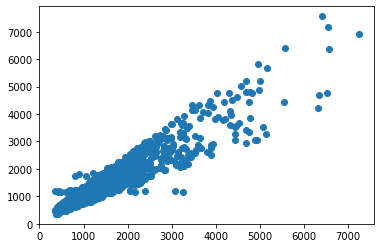

In [148]:
# Calculation of MSE for Test data set
test_mse_5 = np.mean((lm5.predict(data_test.drop('AgentBonus_Per_Policy',axis=1))-data_test['AgentBonus_Per_Policy'])**2)
test_mse_5
#Root Mean Squared Error
print('test data root mean square error value is : '+ str(np.sqrt(test_mse_5)))
# Calculation of MSE
train_mse_5 = np.mean((lm5.predict(data_train.drop('AgentBonus_Per_Policy',axis=1))-data_train['AgentBonus_Per_Policy'])**2)
train_mse_5
#Root Mean Squared Error
print('Train data root mean square error value is : '+ str(np.sqrt(train_mse_5)))
print('Equation for model is :')
for i,j in np.array(lm5.params.reset_index()):
    print('({}) * {} +'.format(round(j,5),i),end=' ')
    
# Prediction on Test data
y_pred_5 = lm5.predict(data_test)
plt.scatter(y_test['AgentBonus_Per_Policy'], y_pred_5)
plt.show()

train_rmse_5=str(np.sqrt(train_mse_5))
test_rmse_5=str(np.sqrt(test_mse_5))

In [149]:
from statsmodels.iolib.summary import Summary

y_test_predict = lm5.predict(data_test)
y_train_predict = lm5.predict(data_train)

# The MAE ( Mean asbsolute error)
print('The MAE is:', mean_absolute_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_5_train_MAE=mean_absolute_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The MSE ( Mean Squared Error)
print('The MSE is:', mean_squared_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_5_train_MSE=mean_squared_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The MAPE ( Mean Absolute Percentage Error)
print( 'The MAPE is', mean_absolute_percentage_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_5_train_MAPE=mean_absolute_percentage_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The EVS (Expalained Variance Score)
print('The EVS is', explained_variance_score(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_5_train_EVS=explained_variance_score(data_train['AgentBonus_Per_Policy'],y_train_predict)

# The MAE ( Mean asbsolute error)
print('The MAE for Test data is:', mean_absolute_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_5_test_MAE=mean_absolute_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The MSE ( Mean Squared Error)
print('The MSE for Test data is:', mean_squared_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_5_test_MSE=mean_squared_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The MAPE ( Mean Absolute Percentage Error)
print('The MAPE for Test data is', mean_absolute_percentage_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_5_test_MAPE=mean_absolute_percentage_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The EVS (Expalained Variance Score)
print('The EVS for Test data is', explained_variance_score(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_5_test_EVS=explained_variance_score(data_test['AgentBonus_Per_Policy'],y_test_predict)

The MAE is: 238.7225522925963
The MSE is: 125759.57796163307
The MAPE is 0.17578164056856227
The EVS is 0.8836878751771549
The MAE for Test data is: 243.7449266459956
The MSE for Test data is: 124755.75000393717
The MAPE for Test data is 0.17924930466767
The EVS for Test data is 0.8712281489777617


In [150]:
data2= pd.DataFrame({
        'Stats Model 5 ':[train_rmse_5,test_rmse_5, Stats_model_5_train_MAE, Stats_model_5_test_MAE,
                  Stats_model_5_train_MSE, Stats_model_5_test_MSE, Stats_model_5_train_MAPE, Stats_model_5_test_MAPE,
                  Stats_model_5_train_EVS, Stats_model_5_test_EVS],
        },index=index)

final_result=pd.concat([final_result,data2],axis=1)
final_result

,Linear Regression,Stats Model 1,Stats Model 2,Stats Model 3,Stats Model 4,Stats Model 5
Train RMSE,317.483460,317.48346002535055,354.54396801961036,354.5472293235076,354.57408724890837,354.6259691021416
Test RMSE,316.634998,316.63499771886285,353.56277958413546,353.5568690941128,353.35723000116565,353.20780003269664
Train MAE,220.321007,220.321007,238.541875,238.571656,238.559194,238.722552
Test MAE,222.519490,222.51949,244.141863,244.150994,244.031095,243.744927
Train MSE,100795.747390,100795.74739,125701.425259,125703.737821,125722.783348,125759.577962
Test MSE,100257.721780,100257.72178,125006.639107,125002.459684,124861.331994,124755.750004
Train MAPE,0.170724,0.170724,0.175574,0.175633,0.175619,0.175782
Test MAPE,0.171265,0.171265,0.179678,0.179681,0.17965,0.179249
Train EVS,0.906776,0.906776,0.883742,0.88374,0.883722,0.883688
Test EVS,0.896495,0.896495,0.870965,0.87097,0.871115,0.871228


### Iteration 6:
### Lets remove "EducationField" this time and try again

In [151]:
f_6 = 'AgentBonus_Per_Policy~CustTenure+Designation+MaritalStatus+ExistingPolicyTenure+PaymentMethod+SumAssured_Per_Policy'
lm6 = SM.ols(formula= f_6, data = data_train).fit()
lm6.params
print(lm6.summary()) 

                              OLS Regression Results                             
Dep. Variable:     AgentBonus_Per_Policy   R-squared:                       0.884
Model:                               OLS   Adj. R-squared:                  0.883
Method:                    Least Squares   F-statistic:                     3996.
Date:                   Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                           08:27:55   Log-Likelihood:                -23066.
No. Observations:                   3164   AIC:                         4.615e+04
Df Residuals:                       3157   BIC:                         4.619e+04
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


test data root mean square error value is : 353.0174978354055
Train data root mean square error value is : 354.6848065841537
Equation for model is :
(94.604435) * Intercept + (2.477149) * CustTenure + (9.676381) * Designation + (15.874855) * MaritalStatus + (2.295078) * ExistingPolicyTenure + (-5.490292) * PaymentMethod + (0.005841) * SumAssured_Per_Policy + 

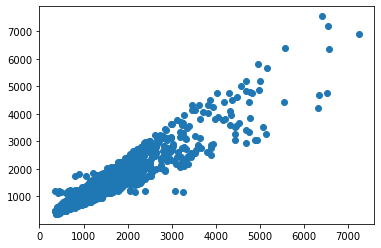

In [152]:
# Calculation of MSE for Test data set
test_mse_6 = np.mean((lm6.predict(data_test.drop('AgentBonus_Per_Policy',axis=1))-data_test['AgentBonus_Per_Policy'])**2)
test_mse_6
#Root Mean Squared Error
print('test data root mean square error value is : '+ str(np.sqrt(test_mse_6)))
# Calculation of MSE
train_mse_6 = np.mean((lm6.predict(data_train.drop('AgentBonus_Per_Policy',axis=1))-data_train['AgentBonus_Per_Policy'])**2)
train_mse_6
#Root Mean Squared Error
print('Train data root mean square error value is : '+ str(np.sqrt(train_mse_6)))
print('Equation for model is :')
for i,j in np.array(lm6.params.reset_index()):
    print('({}) * {} +'.format(round(j,6),i),end=' ')
    
# Prediction on Test data
y_pred_6 = lm6.predict(data_test)
plt.scatter(y_test['AgentBonus_Per_Policy'], y_pred_6)
plt.show()

train_rmse_6=str(np.sqrt(train_mse_6))
test_rmse_6=str(np.sqrt(test_mse_6))

In [153]:
from statsmodels.iolib.summary import Summary

y_test_predict = lm6.predict(data_test)
y_train_predict = lm6.predict(data_train)

# The MAE ( Mean asbsolute error)
print('The MAE is:', mean_absolute_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_6_train_MAE=mean_absolute_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The MSE ( Mean Squared Error)
print('The MSE is:', mean_squared_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_6_train_MSE=mean_squared_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The MAPE ( Mean Absolute Percentage Error)
print( 'The MAPE is', mean_absolute_percentage_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_6_train_MAPE=mean_absolute_percentage_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The EVS (Expalained Variance Score)
print('The EVS is', explained_variance_score(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_6_train_EVS=explained_variance_score(data_train['AgentBonus_Per_Policy'],y_train_predict)

# The MAE ( Mean asbsolute error)
print('The MAE for Test data is:', mean_absolute_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_6_test_MAE=mean_absolute_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The MSE ( Mean Squared Error)
print('The MSE for Test data is:', mean_squared_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_6_test_MSE=mean_squared_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The MAPE ( Mean Absolute Percentage Error)
print('The MAPE for Test data is', mean_absolute_percentage_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_6_test_MAPE=mean_absolute_percentage_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The EVS (Expalained Variance Score)
print('The EVS for Test data is', explained_variance_score(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_6_test_EVS=explained_variance_score(data_test['AgentBonus_Per_Policy'],y_test_predict)

The MAE is: 238.75283376070934
The MSE is: 125801.31202163847
The MAPE is 0.1757596050050589
The EVS is 0.8836492763103696
The MAE for Test data is: 243.66960008758784
The MSE for Test data is: 124621.35377797067
The MAPE for Test data is 0.17924158024091794
The EVS for Test data is 0.8713672241332633


In [154]:
data2= pd.DataFrame({
       'Stats Model 6 ':[train_rmse_6,test_rmse_6, Stats_model_6_train_MAE, Stats_model_6_test_MAE,
                  Stats_model_6_train_MSE, Stats_model_6_test_MSE, Stats_model_6_train_MAPE, Stats_model_6_test_MAPE,
                  Stats_model_6_train_EVS, Stats_model_6_test_EVS],
        },index=index)

final_result=pd.concat([final_result,data2],axis=1)
final_result

,Linear Regression,Stats Model 1,Stats Model 2,Stats Model 3,Stats Model 4,Stats Model 5,Stats Model 6
Train RMSE,317.483460,317.48346002535055,354.54396801961036,354.5472293235076,354.57408724890837,354.6259691021416,354.6848065841537
Test RMSE,316.634998,316.63499771886285,353.56277958413546,353.5568690941128,353.35723000116565,353.20780003269664,353.0174978354055
Train MAE,220.321007,220.321007,238.541875,238.571656,238.559194,238.722552,238.752834
Test MAE,222.519490,222.51949,244.141863,244.150994,244.031095,243.744927,243.6696
Train MSE,100795.747390,100795.74739,125701.425259,125703.737821,125722.783348,125759.577962,125801.312022
Test MSE,100257.721780,100257.72178,125006.639107,125002.459684,124861.331994,124755.750004,124621.353778
Train MAPE,0.170724,0.170724,0.175574,0.175633,0.175619,0.175782,0.17576
Test MAPE,0.171265,0.171265,0.179678,0.179681,0.17965,0.179249,0.179242
Train EVS,0.906776,0.906776,0.883742,0.88374,0.883722,0.883688,0.883649
Test EVS,0.896495,0.896495,0.870965,0.87097,0.871115,0.871228,0.871367


# Iteration 7:
### Lets remove "PaymentMethod" this time and try again

In [155]:
f_7 = 'AgentBonus_Per_Policy~CustTenure+Designation+MaritalStatus+ExistingPolicyTenure+SumAssured_Per_Policy'
lm7 = SM.ols(formula= f_7, data = data_train).fit()
lm7.params
print(lm7.summary()) 

                              OLS Regression Results                             
Dep. Variable:     AgentBonus_Per_Policy   R-squared:                       0.884
Model:                               OLS   Adj. R-squared:                  0.883
Method:                    Least Squares   F-statistic:                     4794.
Date:                   Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                           08:27:56   Log-Likelihood:                -23067.
No. Observations:                   3164   AIC:                         4.615e+04
Df Residuals:                       3158   BIC:                         4.618e+04
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


test data root mean square error value is : 352.8757950057764
Train data root mean square error value is : 354.7636336409267
Equation for model is :
(88.8686601) * Intercept + (2.4924456) * CustTenure + (9.5467356) * Designation + (15.6576766) * MaritalStatus + (2.3353965) * ExistingPolicyTenure + (0.0058408) * SumAssured_Per_Policy + 

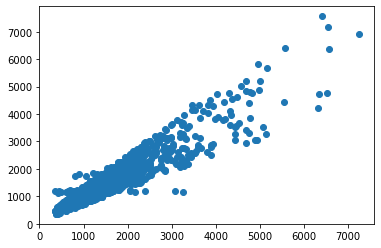

In [156]:
# Calculation of MSE for Test data set
test_mse_7 = np.mean((lm7.predict(data_test.drop('AgentBonus_Per_Policy',axis=1))-data_test['AgentBonus_Per_Policy'])**2)
test_mse_7
#Root Mean Squared Error
print('test data root mean square error value is : '+ str(np.sqrt(test_mse_7)))
# Calculation of MSE
train_mse_7 = np.mean((lm7.predict(data_train.drop('AgentBonus_Per_Policy',axis=1))-data_train['AgentBonus_Per_Policy'])**2)
train_mse_7
#Root Mean Squared Error
print('Train data root mean square error value is : '+ str(np.sqrt(train_mse_7)))
print('Equation for model is :')
for i,j in np.array(lm7.params.reset_index()):
    print('({}) * {} +'.format(round(j,7),i),end=' ')
    
# Prediction on Test data
y_pred_7 = lm7.predict(data_test)
plt.scatter(y_test['AgentBonus_Per_Policy'], y_pred_7)
plt.show()

train_rmse_7=str(np.sqrt(train_mse_7))
test_rmse_7=str(np.sqrt(test_mse_7))

In [157]:
from statsmodels.iolib.summary import Summary

y_test_predict = lm7.predict(data_test)
y_train_predict = lm7.predict(data_train)

# The MAE ( Mean asbsolute error)
print('The MAE is:', mean_absolute_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_7_train_MAE=mean_absolute_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The MSE ( Mean Squared Error)
print('The MSE is:', mean_squared_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_7_train_MSE=mean_squared_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The MAPE ( Mean Absolute Percentage Error)
print( 'The MAPE is', mean_absolute_percentage_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_7_train_MAPE=mean_absolute_percentage_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The EVS (Expalained Variance Score)
print('The EVS is', explained_variance_score(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_7_train_EVS=explained_variance_score(data_train['AgentBonus_Per_Policy'],y_train_predict)

# The MAE ( Mean asbsolute error)
print('The MAE for Test data is:', mean_absolute_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_7_test_MAE=mean_absolute_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The MSE ( Mean Squared Error)
print('The MSE for Test data is:', mean_squared_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_7_test_MSE=mean_squared_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The MAPE ( Mean Absolute Percentage Error)
print('The MAPE for Test data is', mean_absolute_percentage_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_7_test_MAPE=mean_absolute_percentage_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The EVS (Expalained Variance Score)
print('The EVS for Test data is', explained_variance_score(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_7_test_EVS=explained_variance_score(data_test['AgentBonus_Per_Policy'],y_test_predict)

The MAE is: 238.73769005794188
The MSE is: 125857.23575411373
The MAPE is 0.17574443939387427
The EVS is 0.8835975537437258
The MAE for Test data is: 243.74492654436207
The MSE for Test data is: 124521.32670095873
The MAPE for Test data is 0.17943540236495023
The EVS for Test data is 0.8714692631067685


In [158]:
data2= pd.DataFrame({
        'Stats Model 7 ':[train_rmse_7,test_rmse_7 , Stats_model_7_train_MAE, Stats_model_7_test_MAE,
                  Stats_model_7_train_MSE, Stats_model_7_test_MSE, Stats_model_7_train_MAPE, Stats_model_7_test_MAPE,
                  Stats_model_7_train_EVS, Stats_model_7_test_EVS],
        },index=index)

final_result=pd.concat([final_result,data2],axis=1)
final_result

,Linear Regression,Stats Model 1,Stats Model 2,Stats Model 3,Stats Model 4,Stats Model 5,Stats Model 6,Stats Model 7
Train RMSE,317.483460,317.48346002535055,354.54396801961036,354.5472293235076,354.57408724890837,354.6259691021416,354.6848065841537,354.7636336409267
Test RMSE,316.634998,316.63499771886285,353.56277958413546,353.5568690941128,353.35723000116565,353.20780003269664,353.0174978354055,352.8757950057764
Train MAE,220.321007,220.321007,238.541875,238.571656,238.559194,238.722552,238.752834,238.73769
Test MAE,222.519490,222.51949,244.141863,244.150994,244.031095,243.744927,243.6696,243.744927
Train MSE,100795.747390,100795.74739,125701.425259,125703.737821,125722.783348,125759.577962,125801.312022,125857.235754
Test MSE,100257.721780,100257.72178,125006.639107,125002.459684,124861.331994,124755.750004,124621.353778,124521.326701
Train MAPE,0.170724,0.170724,0.175574,0.175633,0.175619,0.175782,0.17576,0.175744
Test MAPE,0.171265,0.171265,0.179678,0.179681,0.17965,0.179249,0.179242,0.179435
Train EVS,0.906776,0.906776,0.883742,0.88374,0.883722,0.883688,0.883649,0.883598
Test EVS,0.896495,0.896495,0.870965,0.87097,0.871115,0.871228,0.871367,0.871469


# Iteration 8:
### Lets remove "Designation" this time and try again

In [159]:
f_8 = 'AgentBonus_Per_Policy~CustTenure+MaritalStatus+ExistingPolicyTenure+SumAssured_Per_Policy'
lm8 = SM.ols(formula= f_8, data = data_train).fit()
lm8.params
print(lm8.summary()) 

                              OLS Regression Results                             
Dep. Variable:     AgentBonus_Per_Policy   R-squared:                       0.884
Model:                               OLS   Adj. R-squared:                  0.883
Method:                    Least Squares   F-statistic:                     5990.
Date:                   Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                           08:27:56   Log-Likelihood:                -23068.
No. Observations:                   3164   AIC:                         4.615e+04
Df Residuals:                       3159   BIC:                         4.618e+04
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


test data root mean square error value is : 352.68578464437667
Train data root mean square error value is : 354.8816410065518
Equation for model is :
(103.27100618) * Intercept + (2.6187945) * CustTenure + (14.97778476) * MaritalStatus + (2.37797114) * ExistingPolicyTenure + (0.00584488) * SumAssured_Per_Policy + 

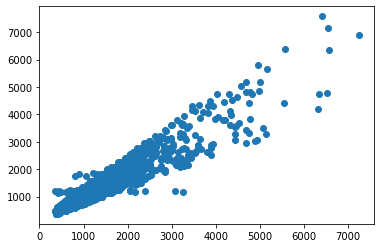

In [160]:
# Calculation of MSE for Test data set
test_mse_8 = np.mean((lm8.predict(data_test.drop('AgentBonus_Per_Policy',axis=1))-data_test['AgentBonus_Per_Policy'])**2)
test_mse_8
#Root Mean Squared Error
print('test data root mean square error value is : '+ str(np.sqrt(test_mse_8)))
# Calculation of MSE
train_mse_8 = np.mean((lm8.predict(data_train.drop('AgentBonus_Per_Policy',axis=1))-data_train['AgentBonus_Per_Policy'])**2)
train_mse_8
#Root Mean Squared Error
print('Train data root mean square error value is : '+ str(np.sqrt(train_mse_8)))
print('Equation for model is :')
for i,j in np.array(lm8.params.reset_index()):
    print('({}) * {} +'.format(round(j,8),i),end=' ')
    
# Prediction on Test data
y_pred_8 = lm8.predict(data_test)
plt.scatter(y_test['AgentBonus_Per_Policy'], y_pred_8)
plt.show()

train_rmse_8=str(np.sqrt(train_mse_8))
test_rmse_8=str(np.sqrt(test_mse_8))

In [161]:
from statsmodels.iolib.summary import Summary

y_test_predict = lm8.predict(data_test)
y_train_predict = lm8.predict(data_train)

# The MAE ( Mean asbsolute error)
print('The MAE is:', mean_absolute_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_8_train_MAE=mean_absolute_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The MSE ( Mean Squared Error)
print('The MSE is:', mean_squared_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_8_train_MSE=mean_squared_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The MAPE ( Mean Absolute Percentage Error)
print( 'The MAPE is', mean_absolute_percentage_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_8_train_MAPE=mean_absolute_percentage_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The EVS (Expalained Variance Score)
print('The EVS is', explained_variance_score(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_8_train_EVS=explained_variance_score(data_train['AgentBonus_Per_Policy'],y_train_predict)

# The MAE ( Mean asbsolute error)
print('The MAE for Test data is:', mean_absolute_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_8_test_MAE=mean_absolute_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The MSE ( Mean Squared Error)
print('The MSE for Test data is:', mean_squared_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_8_test_MSE=mean_squared_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The MAPE ( Mean Absolute Percentage Error)
print('The MAPE for Test data is', mean_absolute_percentage_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_8_test_MAPE=mean_absolute_percentage_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The EVS (Expalained Variance Score)
print('The EVS for Test data is', explained_variance_score(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_8_test_EVS=explained_variance_score(data_test['AgentBonus_Per_Policy'],y_test_predict)

The MAE is: 238.760797678599
The MSE is: 125940.97912350266
The MAPE is 0.17587641769309673
The EVS is 0.883520101438372
The MAE for Test data is: 243.45874675212468
The MSE for Test data is: 124387.26269021942
The MAPE for Test data is 0.17926498538699695
The EVS for Test data is 0.8716107984209899


In [162]:
data2= pd.DataFrame({
        'Stats Model 8 ':[train_rmse_8,test_rmse_8, Stats_model_8_train_MAE, Stats_model_8_test_MAE,
                  Stats_model_8_train_MSE, Stats_model_8_test_MSE, Stats_model_8_train_MAPE, Stats_model_8_test_MAPE,
                  Stats_model_8_train_EVS, Stats_model_8_test_EVS],
        },index=index)

final_result=pd.concat([final_result,data2],axis=1)
final_result

,Linear Regression,Stats Model 1,Stats Model 2,Stats Model 3,Stats Model 4,Stats Model 5,Stats Model 6,Stats Model 7,Stats Model 8
Train RMSE,317.483460,317.48346002535055,354.54396801961036,354.5472293235076,354.57408724890837,354.6259691021416,354.6848065841537,354.7636336409267,354.8816410065518
Test RMSE,316.634998,316.63499771886285,353.56277958413546,353.5568690941128,353.35723000116565,353.20780003269664,353.0174978354055,352.8757950057764,352.68578464437667
Train MAE,220.321007,220.321007,238.541875,238.571656,238.559194,238.722552,238.752834,238.73769,238.760798
Test MAE,222.519490,222.51949,244.141863,244.150994,244.031095,243.744927,243.6696,243.744927,243.458747
Train MSE,100795.747390,100795.74739,125701.425259,125703.737821,125722.783348,125759.577962,125801.312022,125857.235754,125940.979124
Test MSE,100257.721780,100257.72178,125006.639107,125002.459684,124861.331994,124755.750004,124621.353778,124521.326701,124387.26269
Train MAPE,0.170724,0.170724,0.175574,0.175633,0.175619,0.175782,0.17576,0.175744,0.175876
Test MAPE,0.171265,0.171265,0.179678,0.179681,0.17965,0.179249,0.179242,0.179435,0.179265
Train EVS,0.906776,0.906776,0.883742,0.88374,0.883722,0.883688,0.883649,0.883598,0.88352
Test EVS,0.896495,0.896495,0.870965,0.87097,0.871115,0.871228,0.871367,0.871469,0.871611


# Iteration 9:
### Lets remove "MaritalStatus" this time and try again

In [163]:
f_9 = 'AgentBonus_Per_Policy~CustTenure+ExistingPolicyTenure+SumAssured_Per_Policy'
lm9 = SM.ols(formula= f_9, data = data_train).fit()
lm9.params
print(lm9.summary()) 

                              OLS Regression Results                             
Dep. Variable:     AgentBonus_Per_Policy   R-squared:                       0.883
Model:                               OLS   Adj. R-squared:                  0.883
Method:                    Least Squares   F-statistic:                     7980.
Date:                   Sun, 15 Jan 2023   Prob (F-statistic):               0.00
Time:                           08:27:56   Log-Likelihood:                -23070.
No. Observations:                   3164   AIC:                         4.615e+04
Df Residuals:                       3160   BIC:                         4.617e+04
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


test data root mean square error value is : 352.60212402026525
Train data root mean square error value is : 355.0675639410347
Equation for model is :
(121.585179629) * Intercept + (2.528229031) * CustTenure + (2.279666785) * ExistingPolicyTenure + (0.005849721) * SumAssured_Per_Policy + 

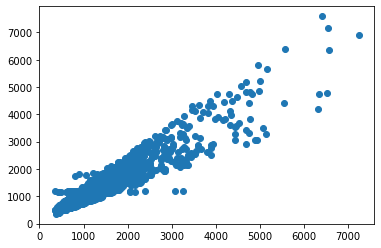

In [164]:
# Calculation of MSE for Test data set
test_mse_9 = np.mean((lm9.predict(data_test.drop('AgentBonus_Per_Policy',axis=1))-data_test['AgentBonus_Per_Policy'])**2)
test_mse_9
#Root Mean Squared Error
print('test data root mean square error value is : '+ str(np.sqrt(test_mse_9)))
# Calculation of MSE
train_mse_9 = np.mean((lm9.predict(data_train.drop('AgentBonus_Per_Policy',axis=1))-data_train['AgentBonus_Per_Policy'])**2)
train_mse_9
#Root Mean Squared Error
print('Train data root mean square error value is : '+ str(np.sqrt(train_mse_9)))
print('Equation for model is :')
for i,j in np.array(lm9.params.reset_index()):
    print('({}) * {} +'.format(round(j,9),i),end=' ')
    
# Prediction on Test data
y_pred_9 = lm9.predict(data_test)
plt.scatter(y_test['AgentBonus_Per_Policy'], y_pred_9)
plt.show()

train_rmse_9=str(np.sqrt(train_mse_9))
test_rmse_9=str(np.sqrt(test_mse_9))

In [165]:
from statsmodels.iolib.summary import Summary

y_test_predict = lm9.predict(data_test)
y_train_predict = lm9.predict(data_train)

# The MAE ( Mean asbsolute error)
print('The MAE is:', mean_absolute_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_9_train_MAE=mean_absolute_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The MSE ( Mean Squared Error)
print('The MSE is:', mean_squared_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_9_train_MSE=mean_squared_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The MAPE ( Mean Absolute Percentage Error)
print( 'The MAPE is', mean_absolute_percentage_error(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_9_train_MAPE=mean_absolute_percentage_error(data_train['AgentBonus_Per_Policy'],y_train_predict)
# The EVS (Expalained Variance Score)
print('The EVS is', explained_variance_score(data_train['AgentBonus_Per_Policy'],y_train_predict))
Stats_model_9_train_EVS=explained_variance_score(data_train['AgentBonus_Per_Policy'],y_train_predict)

# The MAE ( Mean asbsolute error)
print('The MAE for Test data is:', mean_absolute_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_9_test_MAE=mean_absolute_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The MSE ( Mean Squared Error)
print('The MSE for Test data is:', mean_squared_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_9_test_MSE=mean_squared_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The MAPE ( Mean Absolute Percentage Error)
print('The MAPE for Test data is', mean_absolute_percentage_error(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_9_test_MAPE=mean_absolute_percentage_error(data_test['AgentBonus_Per_Policy'],y_test_predict)
# The EVS (Expalained Variance Score)
print('The EVS for Test data is', explained_variance_score(data_test['AgentBonus_Per_Policy'],y_test_predict))
Stats_model_9_test_EVS=explained_variance_score(data_test['AgentBonus_Per_Policy'],y_test_predict)

The MAE is: 238.6871961437201
The MSE is: 126072.974963021
The MAPE is 0.17554253326507824
The EVS is 0.8833980215394808
The MAE for Test data is: 243.29840734002366
The MSE for Test data is: 124328.25786360275
The MAPE for Test data is 0.1787555654744601
The EVS for Test data is 0.8716758974028127


In [166]:
data2= pd.DataFrame({
       'Stats Model 9 ':[train_rmse_9,test_rmse_9 , Stats_model_9_train_MAE, Stats_model_9_test_MAE,
                  Stats_model_9_train_MSE, Stats_model_9_test_MSE, Stats_model_9_train_MAPE, Stats_model_9_test_MAPE,
                  Stats_model_9_train_EVS, Stats_model_9_test_EVS],
        },index=index)

final_result=pd.concat([final_result,data2],axis=1)
final_result.T

,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MSE,Test MSE,Train MAPE,Test MAPE,Train EVS,Test EVS
Linear Regression,317.48346,316.634998,220.321007,222.51949,100795.74739,100257.72178,0.170724,0.171265,0.906776,0.896495
Stats Model 1,317.48346002535055,316.63499771886285,220.321007,222.51949,100795.74739,100257.72178,0.170724,0.171265,0.906776,0.896495
Stats Model 2,354.54396801961036,353.56277958413546,238.541875,244.141863,125701.425259,125006.639107,0.175574,0.179678,0.883742,0.870965
Stats Model 3,354.5472293235076,353.5568690941128,238.571656,244.150994,125703.737821,125002.459684,0.175633,0.179681,0.88374,0.87097
Stats Model 4,354.57408724890837,353.35723000116565,238.559194,244.031095,125722.783348,124861.331994,0.175619,0.17965,0.883722,0.871115
Stats Model 5,354.6259691021416,353.20780003269664,238.722552,243.744927,125759.577962,124755.750004,0.175782,0.179249,0.883688,0.871228
Stats Model 6,354.6848065841537,353.0174978354055,238.752834,243.6696,125801.312022,124621.353778,0.17576,0.179242,0.883649,0.871367
Stats Model 7,354.7636336409267,352.8757950057764,238.73769,243.744927,125857.235754,124521.326701,0.175744,0.179435,0.883598,0.871469
Stats Model 8,354.8816410065518,352.68578464437667,238.760798,243.458747,125940.979124,124387.26269,0.175876,0.179265,0.88352,0.871611
Stats Model 9,355.0675639410347,352.60212402026525,238.687196,243.298407,126072.974963,124328.257864,0.175543,0.178756,0.883398,0.871676


### Now everything looks perfect, 
## We have only 3 fields, which are playing deciding factor in order to determine the AgentBonus field, and those are :
#### CustTenure
#### ExistingPolicyTenure
#### SumAssured_per_policy

In [167]:
#Concatenation of X and y into one DF
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,ExistingPolicyTenure,Zone,PaymentMethod,SumAssured_Per_Policy,AgentBonus_Per_Policy
2461,12.0,16.0,2,1,1,1,4,1,3.0,2,20742,4.0,3,0,160266,1313.666667
3681,31.0,15.0,0,3,5,1,4,2,5.0,1,23398,4.0,3,0,123541,1029.600000
1309,15.0,6.0,0,2,2,1,3,1,1.0,2,16232,6.0,1,0,453360,3084.000000
4254,5.0,16.0,1,1,1,1,4,2,2.0,1,23536,1.0,3,0,141098,1294.500000
1335,8.0,17.0,0,2,2,1,1,1,1.0,1,17269,6.0,3,1,750165,4145.000000


In [168]:
data_test.head(10)

,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,ExistingPolicyTenure,Zone,PaymentMethod,SumAssured_Per_Policy,AgentBonus_Per_Policy
610,11.0,23.0,2,2,2,1,3,2,2.0,2,22756,1.0,3,0,392541,2844.500000
1519,20.0,7.0,0,3,5,0,3,4,1.0,1,34517,7.0,1,0,1200156,6558.000000
1620,7.0,15.0,0,2,4,1,3,2,1.0,1,18697,4.0,1,0,430218,2431.000000
2031,13.0,22.0,2,3,5,1,3,2,4.0,1,21385,4.0,1,0,221174,1122.750000
494,12.0,14.0,0,3,5,1,3,1,3.0,0,17259,1.0,3,0,84569,805.333333
1011,11.0,22.0,0,2,2,1,3,0,3.0,2,27298,13.0,3,0,297106,1822.666667
3818,15.0,10.0,0,3,5,1,4,1,2.0,1,20527,2.0,1,0,466989,2566.000000
3970,31.0,25.0,0,3,0,1,5,0,4.0,1,32575,25.0,3,3,272589,1547.250000
745,18.0,18.0,2,2,2,1,4,1,2.0,0,18867,1.0,3,3,251308,2264.000000
3240,35.0,12.0,0,2,2,0,4,3,2.0,2,26402,15.0,3,0,496621,2904.000000


In [169]:
# Calculation of MSE for Test data set
test_mse = np.mean((lm9.predict(data_test.drop('AgentBonus_Per_Policy',axis=1))-data_test['AgentBonus_Per_Policy'])**2)
test_mse

124328.2578636025

In [170]:
#Root Mean Squared Error
print('test data root mean square error value is : '+ str(np.sqrt(test_mse)))

test data root mean square error value is : 352.60212402026525


In [171]:
# Calculation of MSE
train_mse = np.mean((lm9.predict(data_train.drop('AgentBonus_Per_Policy',axis=1))-data_train['AgentBonus_Per_Policy'])**2)
train_mse

126072.97496302074

In [172]:
#Root Mean Squared Error
print('test data root mean square error value is : '+ str(np.sqrt(train_mse)))

test data root mean square error value is : 355.0675639410347


In [173]:
for i,j in np.array(lm9.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(121.59) * Intercept + (2.53) * CustTenure + (2.28) * ExistingPolicyTenure + (0.01) * SumAssured_Per_Policy + 

## Decision Tree Regressor Model

In [174]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3164, 15) (1356, 15) (3164, 1) (1356, 1)


In [175]:
# Decision tree Regression Model building
# Importing the regressor

from sklearn.tree import DecisionTreeRegressor

In [176]:
# Creating and fitting the model

DT_model=DecisionTreeRegressor().fit(X_train,y_train)

In [177]:
# The coefficient of determinantion

print('The training r square is : %.2f'% DT_model.score(X_train,y_train))

The training r square is : 1.00


In [178]:
# prediction on training data
y_train_pred_DT=DT_model.predict(X_train)
# prediction on test data
y_test_pred_DT=DT_model.predict(X_test)

# The MAE ( Mean asbsolute error)
print('The MAE is:', mean_absolute_error(y_train,y_train_pred_DT))
dtree_model_train_MAE=mean_absolute_error(y_train,y_train_pred_DT)
# The MSE ( Mean Squared Error)
print('The MSE is:', mean_squared_error(y_train,y_train_pred_DT))
dtree_model_train_MSE=mean_squared_error(y_train,y_train_pred_DT)
# The MAPE ( Mean Absolute Percentage Error)
print( 'The MAPE is', mean_absolute_percentage_error(y_train,y_train_pred_DT))
dtree_model_train_MAPE=mean_absolute_percentage_error(y_train,y_train_pred_DT)
# The EVS (Expalained Variance Score)
print('The EVS is', explained_variance_score(y_train,y_train_pred_DT))
dtree_model_train_EVS=explained_variance_score(y_train,y_train_pred_DT)
# The RMSE
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(y_train,y_train_pred_DT)))
dtree_model_train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pred_DT))

# The MAE ( Mean asbsolute error)
print('The MAE for Test data is:', mean_absolute_error(y_test, y_test_pred_DT))
dtree_model_test_MAE=mean_absolute_error(y_test, y_test_pred_DT)
# The MSE ( Mean Squared Error)
print('The MSE for Test data is:', mean_squared_error(y_test, y_test_pred_DT))
dtree_model_test_MSE=mean_squared_error(y_test, y_test_pred_DT)
# The MAPE ( Mean Absolute Percentage Error)
print('The MAPE for Test data is', mean_absolute_percentage_error(y_test, y_test_pred_DT))
dtree_model_test_MAPE=mean_absolute_percentage_error(y_test, y_test_pred_DT)
# The EVS (Expalained Variance Score)
print('The EVS for Test data is', explained_variance_score(y_test, y_test_pred_DT))
dtree_model_test_EVS=explained_variance_score(y_test, y_test_pred_DT)
# The RMSE
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(y_test, y_test_pred_DT)))
dtree_model_test_rmse=np.sqrt(mean_squared_error(y_test, y_test_pred_DT))

The MAE is: 0.0
The MSE is: 0.0
The MAPE is 0.0
The EVS is 1.0
The RMSE is:0.00
The MAE for Test data is: 244.61928466076697
The MSE for Test data is: 145204.03250962798
The MAPE for Test data is 0.1750816546092636
The EVS for Test data is 0.8502883938086971
The RMSE is:381.06


In [179]:
data2= pd.DataFrame({
        'Decision Tree':[dtree_model_train_rmse,dtree_model_test_rmse, dtree_model_train_MAE, dtree_model_test_MAE,
                             dtree_model_train_MSE, dtree_model_test_MSE, dtree_model_train_MAPE, dtree_model_test_MAPE,
                             dtree_model_train_EVS, dtree_model_test_EVS],
        },index=index)

final_result=pd.concat([final_result,data2],axis=1)
final_result.T

,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MSE,Test MSE,Train MAPE,Test MAPE,Train EVS,Test EVS
Linear Regression,317.48346,316.634998,220.321007,222.51949,100795.74739,100257.72178,0.170724,0.171265,0.906776,0.896495
Stats Model 1,317.48346002535055,316.63499771886285,220.321007,222.51949,100795.74739,100257.72178,0.170724,0.171265,0.906776,0.896495
Stats Model 2,354.54396801961036,353.56277958413546,238.541875,244.141863,125701.425259,125006.639107,0.175574,0.179678,0.883742,0.870965
Stats Model 3,354.5472293235076,353.5568690941128,238.571656,244.150994,125703.737821,125002.459684,0.175633,0.179681,0.88374,0.87097
Stats Model 4,354.57408724890837,353.35723000116565,238.559194,244.031095,125722.783348,124861.331994,0.175619,0.17965,0.883722,0.871115
Stats Model 5,354.6259691021416,353.20780003269664,238.722552,243.744927,125759.577962,124755.750004,0.175782,0.179249,0.883688,0.871228
Stats Model 6,354.6848065841537,353.0174978354055,238.752834,243.6696,125801.312022,124621.353778,0.17576,0.179242,0.883649,0.871367
Stats Model 7,354.7636336409267,352.8757950057764,238.73769,243.744927,125857.235754,124521.326701,0.175744,0.179435,0.883598,0.871469
Stats Model 8,354.8816410065518,352.68578464437667,238.760798,243.458747,125940.979124,124387.26269,0.175876,0.179265,0.88352,0.871611
Stats Model 9,355.0675639410347,352.60212402026525,238.687196,243.298407,126072.974963,124328.257864,0.175543,0.178756,0.883398,0.871676


### Decision Tree Feature importance

In [180]:
f_list_DT=list(X.columns)
f_importance_DT=pd.Series(DT_model.feature_importances_,index=f_list_DT).sort_values(ascending=False)
print(f_importance_DT)

SumAssured_Per_Policy    0.880144
NumberOfPolicy           0.041641
MonthlyIncome            0.023873
Age                      0.018684
CustTenure               0.016263
ExistingPolicyTenure     0.006597
Designation              0.002500
Occupation               0.002048
MaritalStatus            0.001974
EducationField           0.001577
ExistingProdType         0.001219
Zone                     0.000963
PaymentMethod            0.000936
Channel                  0.000846
Gender                   0.000734
dtype: float64


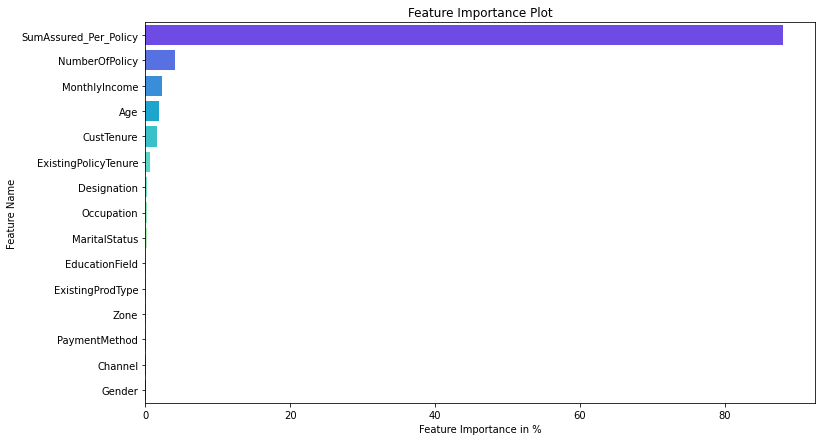

In [181]:
##Print Feature Importances
x=pd.DataFrame(DT_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

### Random Forest Regressor Model

In [182]:
# Random Forest Model

from sklearn.ensemble import RandomForestRegressor

In [183]:
# Instantiation of the model

model=RandomForestRegressor(n_estimators=30,random_state=30)

In [184]:
RF_model=model.fit(X_train,y_train)

In [185]:
# Training Model Evaluation
# The training r_sq

print('The training r_sq is: %.2f'% RF_model.score(X_train,y_train))

The training r_sq is: 0.99


In [186]:
# prediction on training data
y_train_pred_RF=RF_model.predict(X_train)
# prediction on test data
y_test_pred_RF=RF_model.predict(X_test)

# The MAE ( Mean asbsolute error)
print('The MAE is:', mean_absolute_error(y_train,y_train_pred_RF))
rand_Forest_train_MAE=mean_absolute_error(y_train,y_train_pred_RF)
# The MSE ( Mean Squared Error)
print('The MSE is:', mean_squared_error(y_train,y_train_pred_RF))
rand_Forest_train_MSE=mean_squared_error(y_train,y_train_pred_RF)
# The MAPE ( Mean Absolute Percentage Error)
print( 'The MAPE is', mean_absolute_percentage_error(y_train,y_train_pred_RF))
rand_Forest_train_MAPE=mean_absolute_percentage_error(y_train,y_train_pred_RF)
# The EVS (Expalained Variance Score)
print('The EVS is', explained_variance_score(y_train,y_train_pred_RF))
rand_Forest_train_EVS=explained_variance_score(y_train,y_train_pred_RF)
# The RMSE
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(y_train,y_train_pred_RF)))
rand_Forest_train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pred_RF))


# The MAE ( Mean asbsolute error)
print('The MAE for Test data is:', mean_absolute_error(y_test, y_test_pred_RF))
rand_Forest_test_MAE=mean_absolute_error(y_test, y_test_pred_RF)
# The MSE ( Mean Squared Error)
print('The MSE for Test data is:', mean_squared_error(y_test, y_test_pred_RF))
rand_Forest_test_MSE=mean_squared_error(y_test, y_test_pred_RF)
# The MAPE ( Mean Absolute Percentage Error)
print('The MAPE for Test data is', mean_absolute_percentage_error(y_test, y_test_pred_RF))
rand_Forest_test_MAPE=mean_absolute_percentage_error(y_test, y_test_pred_RF)
# The EVS (Expalained Variance Score)
print('The EVS for Test data is', explained_variance_score(y_test, y_test_pred_RF))
rand_Forest_test_EVS=explained_variance_score(y_test, y_test_pred_RF)
# The RMSE
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(y_test, y_test_pred_RF)))
rand_Forest_test_rmse=np.sqrt(mean_squared_error(y_test, y_test_pred_RF))

The MAE is: 65.69539559629162
The MSE is: 10394.932540860822
The MAPE is 0.04768645807947594
The EVS is 0.9903860465401678
The RMSE is:101.96
The MAE for Test data is: 178.33922976073418
The MSE for Test data is: 73391.11692993417
The MAPE for Test data is 0.1282120366478216
The EVS for Test data is 0.9242322882676777
The RMSE is:270.91


In [187]:
data2= pd.DataFrame({
        'Random Forest':[rand_Forest_train_rmse,rand_Forest_test_rmse, rand_Forest_train_MAE, rand_Forest_test_MAE,
                             rand_Forest_train_MSE, rand_Forest_test_MSE, rand_Forest_train_MAPE, rand_Forest_test_MAPE,
                             rand_Forest_train_EVS, rand_Forest_test_EVS],
        },index=index)

final_result=pd.concat([final_result,data2],axis=1)
final_result.T

,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MSE,Test MSE,Train MAPE,Test MAPE,Train EVS,Test EVS
Linear Regression,317.48346,316.634998,220.321007,222.51949,100795.74739,100257.72178,0.170724,0.171265,0.906776,0.896495
Stats Model 1,317.48346002535055,316.63499771886285,220.321007,222.51949,100795.74739,100257.72178,0.170724,0.171265,0.906776,0.896495
Stats Model 2,354.54396801961036,353.56277958413546,238.541875,244.141863,125701.425259,125006.639107,0.175574,0.179678,0.883742,0.870965
Stats Model 3,354.5472293235076,353.5568690941128,238.571656,244.150994,125703.737821,125002.459684,0.175633,0.179681,0.88374,0.87097
Stats Model 4,354.57408724890837,353.35723000116565,238.559194,244.031095,125722.783348,124861.331994,0.175619,0.17965,0.883722,0.871115
Stats Model 5,354.6259691021416,353.20780003269664,238.722552,243.744927,125759.577962,124755.750004,0.175782,0.179249,0.883688,0.871228
Stats Model 6,354.6848065841537,353.0174978354055,238.752834,243.6696,125801.312022,124621.353778,0.17576,0.179242,0.883649,0.871367
Stats Model 7,354.7636336409267,352.8757950057764,238.73769,243.744927,125857.235754,124521.326701,0.175744,0.179435,0.883598,0.871469
Stats Model 8,354.8816410065518,352.68578464437667,238.760798,243.458747,125940.979124,124387.26269,0.175876,0.179265,0.88352,0.871611
Stats Model 9,355.0675639410347,352.60212402026525,238.687196,243.298407,126072.974963,124328.257864,0.175543,0.178756,0.883398,0.871676


## Random Forest Feature importance

In [188]:
f_list_RF=list(X.columns)
f_importance_RF=pd.Series(RF_model.feature_importances_,index=f_list_RF).sort_values(ascending=False)
print(f_importance_RF)

SumAssured_Per_Policy    0.891987
NumberOfPolicy           0.038844
Age                      0.016303
MonthlyIncome            0.015429
CustTenure               0.014407
ExistingPolicyTenure     0.008537
EducationField           0.002414
Designation              0.002192
ExistingProdType         0.001839
MaritalStatus            0.001773
Occupation               0.001504
Gender                   0.001254
Channel                  0.001195
PaymentMethod            0.001186
Zone                     0.001135
dtype: float64


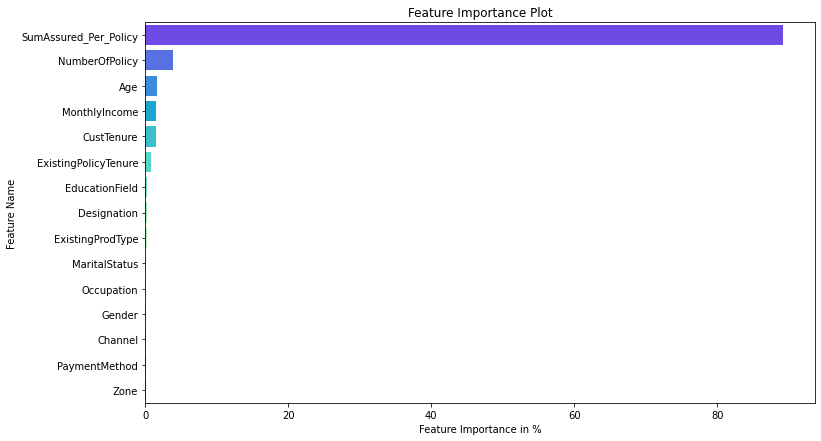

In [189]:
##Print Feature Importances
x=pd.DataFrame(RF_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

### Building a Artificial Neural Network Regressor

In [190]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

## We should Fit and transform oonly x_train data
x_train_scaled = std_scale.fit_transform(X_train)

## we should only transform x_test data , we dont want it to Consider new Mean and median rather use froom Training data
x_test_scaled = std_scale.transform(X_test)

In [191]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [50,100], 
    'activation':['logistic','relu'],
    'max_iter': [250,], 
    'solver': ['adam','sgd'], 
    'tol': [0.1,0.01], 
}

anncl = MLPRegressor(random_state=1)

grid_search_ann = GridSearchCV(estimator = anncl, param_grid = param_grid, cv = 5)

In [192]:
grid_search_ann.fit(x_train_scaled, y_train)

grid_search_ann.best_params_


{'activation': 'logistic',
 'hidden_layer_sizes': 100,
 'max_iter': 250,
 'solver': 'sgd',
 'tol': 0.1}

In [193]:
best_grid_ann = grid_search_ann.best_estimator_

In [194]:
best_grid_ann

MLPRegressor(activation='logistic', hidden_layer_sizes=100, max_iter=250,
             random_state=1, solver='sgd', tol=0.1)

In [195]:
clf=MLPRegressor(hidden_layer_sizes=100,max_iter=2500,solver='adam',verbose=True, activation='relu',
                 random_state=1,tol=0.01)

In [196]:
# prediction on training data
y_train_pred_ANN=best_grid_ann.predict(X_train)
# prediction on test data
y_test_pred_ANN=best_grid_ann.predict(X_test)

# The MAE ( Mean asbsolute error)
print('The MAE is:', mean_absolute_error(y_train,y_train_pred_ANN))
ANN_train_MAE=mean_absolute_error(y_train,y_train_pred_ANN)
# The MSE ( Mean Squared Error)
print('The MSE is:', mean_squared_error(y_train,y_train_pred_ANN))
ANN_train_MSE=mean_squared_error(y_train,y_train_pred_ANN)
# The MAPE ( Mean Absolute Percentage Error)
print( 'The MAPE is', mean_absolute_percentage_error(y_train,y_train_pred_ANN))
ANN_train_MAPE=mean_absolute_percentage_error(y_train,y_train_pred_ANN)
# The EVS (Expalained Variance Score)
print('The EVS is', explained_variance_score(y_train,y_train_pred_ANN))
ANN_train_EVS=explained_variance_score(y_train,y_train_pred_ANN)
# The RMSE
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(y_train,y_train_pred_ANN)))
ANN_train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pred_ANN))


# The MAE ( Mean asbsolute error)
print('The MAE for Test data is:', mean_absolute_error(y_test, y_test_pred_ANN))
ANN_test_MAE=mean_absolute_error(y_test, y_test_pred_ANN)
# The MSE ( Mean Squared Error)
print('The MSE for Test data is:', mean_squared_error(y_test, y_test_pred_ANN))
ANN_test_MSE=mean_squared_error(y_test, y_test_pred_ANN)
# The MAPE ( Mean Absolute Percentage Error)
print('The MAPE for Test data is', mean_absolute_percentage_error(y_test, y_test_pred_ANN))
ANN_test_MAPE=mean_absolute_percentage_error(y_test, y_test_pred_ANN)
# The EVS (Expalained Variance Score)
print('The EVS for Test data is', explained_variance_score(y_test, y_test_pred_ANN))
ANN_test_EVS=explained_variance_score(y_test, y_test_pred_ANN)
# The RMSE
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(y_test, y_test_pred_ANN)))
ANN_test_rmse=np.sqrt(mean_squared_error(y_test, y_test_pred_ANN))

The MAE is: 4972.297786270588
The MSE is: 25833654.247346397
The MAPE is 5.255688936394857
The EVS is -0.09295335197465215
The RMSE is:5082.68
The MAE for Test data is: 4990.048298012509
The MSE for Test data is: 25943347.914660286
The MAPE for Test data is 5.291987651047779
The EVS for Test data is -0.09990145029430497
The RMSE is:5093.46


In [197]:
data2= pd.DataFrame({
        'ANN Model':[ANN_train_rmse,ANN_test_rmse, ANN_train_MAE, ANN_test_MAE,
                             ANN_train_MSE, ANN_test_MSE, ANN_train_MAPE, ANN_test_MAPE,
                             ANN_train_EVS, ANN_test_EVS],
        },index=index)

final_result=pd.concat([final_result,data2],axis=1)
final_result.T

,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MSE,Test MSE,Train MAPE,Test MAPE,Train EVS,Test EVS
Linear Regression,317.48346,316.634998,220.321007,222.51949,100795.74739,100257.72178,0.170724,0.171265,0.906776,0.896495
Stats Model 1,317.48346002535055,316.63499771886285,220.321007,222.51949,100795.74739,100257.72178,0.170724,0.171265,0.906776,0.896495
Stats Model 2,354.54396801961036,353.56277958413546,238.541875,244.141863,125701.425259,125006.639107,0.175574,0.179678,0.883742,0.870965
Stats Model 3,354.5472293235076,353.5568690941128,238.571656,244.150994,125703.737821,125002.459684,0.175633,0.179681,0.88374,0.87097
Stats Model 4,354.57408724890837,353.35723000116565,238.559194,244.031095,125722.783348,124861.331994,0.175619,0.17965,0.883722,0.871115
Stats Model 5,354.6259691021416,353.20780003269664,238.722552,243.744927,125759.577962,124755.750004,0.175782,0.179249,0.883688,0.871228
Stats Model 6,354.6848065841537,353.0174978354055,238.752834,243.6696,125801.312022,124621.353778,0.17576,0.179242,0.883649,0.871367
Stats Model 7,354.7636336409267,352.8757950057764,238.73769,243.744927,125857.235754,124521.326701,0.175744,0.179435,0.883598,0.871469
Stats Model 8,354.8816410065518,352.68578464437667,238.760798,243.458747,125940.979124,124387.26269,0.175876,0.179265,0.88352,0.871611
Stats Model 9,355.0675639410347,352.60212402026525,238.687196,243.298407,126072.974963,124328.257864,0.175543,0.178756,0.883398,0.871676


## ANN Feature importance

### 'MLPRegressor' object has no attribute 'feature_importances_'
### So we can not say, whch Attribute of Sample data set is more contributing in prediction model

## Model Tuning

### Bagging Regressor (Random Forest should be applied for Bagging)
#### A Bagging Regressor is an ensemble meta-estimator that fits base regressor each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

In [198]:
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [199]:
#Create a Gaussian Classifier
clfRF=RandomForestRegressor(n_estimators=50)
bgcl = BaggingRegressor(random_state=1, base_estimator=clfRF, n_estimators=50 ) #BaggingClassifier(n_estimators=50,random_state=1)
model_bgcl = bgcl.fit(X_train, y_train)

In [200]:
RF_model_bagging=bgcl.fit(X_train,y_train)

In [201]:
# Training Model Evaluation
# The training r_sq

print('The training r_sq is: %.2f'% RF_model_bagging.score(X_train,y_train))

The training r_sq is: 0.98


In [202]:
# prediction on training data
y_train_pred_RF_bagging=RF_model_bagging.predict(X_train)
# prediction on test data
y_test_pred_RF_bagging=RF_model_bagging.predict(X_test)

# The MAE ( Mean asbsolute error)
print('The MAE is:', mean_absolute_error(y_train,y_train_pred_RF_bagging))
rand_Forest_bagging_train_MAE=mean_absolute_error(y_train,y_train_pred_RF_bagging)
# The MSE ( Mean Squared Error)
print('The MSE is:', mean_squared_error(y_train,y_train_pred_RF_bagging))
rand_Forest_bagging_train_MSE=mean_squared_error(y_train,y_train_pred_RF_bagging)
# The MAPE ( Mean Absolute Percentage Error)
print( 'The MAPE is', mean_absolute_percentage_error(y_train,y_train_pred_RF_bagging))
rand_Forest_bagging_train_MAPE=mean_absolute_percentage_error(y_train,y_train_pred_RF_bagging)
# The EVS (Expalained Variance Score)
print('The EVS is', explained_variance_score(y_train,y_train_pred_RF_bagging))
rand_Forest_bagging_train_EVS=explained_variance_score(y_train,y_train_pred_RF_bagging)
# The RMSE
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(y_train,y_train_pred_RF_bagging)))
rand_Forest_bagging_train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pred_RF_bagging))


# The MAE ( Mean asbsolute error)
print('The MAE for Test data is:', mean_absolute_error(y_test, y_test_pred_RF_bagging))
rand_Forest_bagging_test_MAE=mean_absolute_error(y_test, y_test_pred_RF_bagging)
# The MSE ( Mean Squared Error)
print('The MSE for Test data is:', mean_squared_error(y_test, y_test_pred_RF_bagging))
rand_Forest_bagging_test_MSE=mean_squared_error(y_test, y_test_pred_RF_bagging)
# The MAPE ( Mean Absolute Percentage Error)
print('The MAPE for Test data is', mean_absolute_percentage_error(y_test, y_test_pred_RF_bagging))
rand_Forest_bagging_test_MAPE=mean_absolute_percentage_error(y_test, y_test_pred_RF_bagging)
# The EVS (Expalained Variance Score)
print('The EVS for Test data is', explained_variance_score(y_test, y_test_pred_RF_bagging))
rand_Forest_bagging_test_EVS=explained_variance_score(y_test, y_test_pred_RF_bagging)
# The RMSE
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(y_test, y_test_pred_RF_bagging)))
rand_Forest_bagging_test_rmse=np.sqrt(mean_squared_error(y_test, y_test_pred_RF_bagging))

The MAE is: 106.47556038137378
The MSE is: 24820.70796807343
The MAPE is 0.07690297993131891
The EVS is 0.9770456925867458
The RMSE is:157.55
The MAE for Test data is: 180.50244943952802
The MSE for Test data is: 72519.03619748793
The MAPE for Test data is 0.12940358828836765
The EVS for Test data is 0.9251368574731786
The RMSE is:269.29


In [203]:
data2= pd.DataFrame({
        'Random Forest Bagging Model':[rand_Forest_bagging_train_rmse,rand_Forest_bagging_test_rmse, rand_Forest_bagging_train_MAE, rand_Forest_bagging_test_MAE,
                             rand_Forest_bagging_train_MSE, rand_Forest_bagging_test_MSE, rand_Forest_bagging_train_MAPE, rand_Forest_bagging_test_MAPE,
                             rand_Forest_bagging_train_EVS, rand_Forest_bagging_test_EVS],
        },index=index)

final_result=pd.concat([final_result,data2],axis=1)
final_result

,Linear Regression,Stats Model 1,Stats Model 2,Stats Model 3,Stats Model 4,Stats Model 5,Stats Model 6,Stats Model 7,Stats Model 8,Stats Model 9,Decision Tree,Random Forest,ANN Model,Random Forest Bagging Model
Train RMSE,317.483460,317.48346002535055,354.54396801961036,354.5472293235076,354.57408724890837,354.6259691021416,354.6848065841537,354.7636336409267,354.8816410065518,355.0675639410347,0.000000,101.955542,5.082682e+03,157.545892
Test RMSE,316.634998,316.63499771886285,353.56277958413546,353.5568690941128,353.35723000116565,353.20780003269664,353.0174978354055,352.8757950057764,352.68578464437667,352.60212402026525,381.056469,270.907949,5.093461e+03,269.293587
Train MAE,220.321007,220.321007,238.541875,238.571656,238.559194,238.722552,238.752834,238.73769,238.760798,238.687196,0.000000,65.695396,4.972298e+03,106.475560
Test MAE,222.519490,222.51949,244.141863,244.150994,244.031095,243.744927,243.6696,243.744927,243.458747,243.298407,244.619285,178.339230,4.990048e+03,180.502449
Train MSE,100795.747390,100795.74739,125701.425259,125703.737821,125722.783348,125759.577962,125801.312022,125857.235754,125940.979124,126072.974963,0.000000,10394.932541,2.583365e+07,24820.707968
Test MSE,100257.721780,100257.72178,125006.639107,125002.459684,124861.331994,124755.750004,124621.353778,124521.326701,124387.26269,124328.257864,145204.032510,73391.116930,2.594335e+07,72519.036197
Train MAPE,0.170724,0.170724,0.175574,0.175633,0.175619,0.175782,0.17576,0.175744,0.175876,0.175543,0.000000,0.047686,5.255689e+00,0.076903
Test MAPE,0.171265,0.171265,0.179678,0.179681,0.17965,0.179249,0.179242,0.179435,0.179265,0.178756,0.175082,0.128212,5.291988e+00,0.129404
Train EVS,0.906776,0.906776,0.883742,0.88374,0.883722,0.883688,0.883649,0.883598,0.88352,0.883398,1.000000,0.990386,-9.295335e-02,0.977046
Test EVS,0.896495,0.896495,0.870965,0.87097,0.871115,0.871228,0.871367,0.871469,0.871611,0.871676,0.850288,0.924232,-9.990145e-02,0.925137


## Bagging Regressor Feature importance
### 'BaggingRegressor' object has no attribute 'feature_importances_'
### So we can not say, whch Attribute of Sample data set is more contributing in prediction model

### Hyper parameter tuning for random forest

In [204]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [8,10,12],
    'max_features': [3,4,5],
    'max_depth': [8,10],   
    'min_samples_leaf': [30,60,90],   ## 1-3% of training data set
    'min_samples_split': [100,180,250],   ## 3 times of min sample leaf
    'n_estimators': [100,200] 
}

rfcl = RandomForestRegressor(random_state=1)

grid_search_random_forest = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [205]:
grid_search_random_forest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [8, 10], 'max_features': [3, 4, 5],
                         'min_samples_leaf': [30, 60, 90],
                         'min_samples_split': [100, 180, 250],
                         'n_estimators': [100, 200]})

In [206]:
grid_search_random_forest.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 30,
 'min_samples_split': 100,
 'n_estimators': 200}

In [207]:
best_grid_random_forest = grid_search_random_forest.best_estimator_

In [208]:
print(pd.DataFrame(best_grid_random_forest.feature_importances_,
                 columns=["Imp"],
                 index=X_train.columns).sort_values('Imp', ascending=False))

                            Imp
SumAssured_Per_Policy  0.541611
NumberOfPolicy         0.376927
CustTenure             0.024193
Age                    0.021406
MonthlyIncome          0.015970
ExistingPolicyTenure   0.010595
Designation            0.003730
ExistingProdType       0.003584
MaritalStatus          0.000875
PaymentMethod          0.000409
Zone                   0.000235
EducationField         0.000172
Gender                 0.000128
Occupation             0.000099
Channel                0.000066


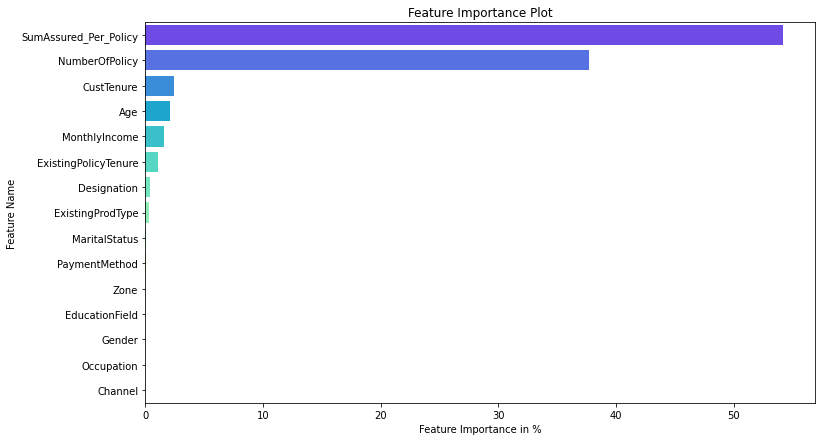

In [209]:
##Print Feature Importances
x=pd.DataFrame(best_grid_random_forest.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [210]:
RF_model_tunned_param=best_grid_random_forest.fit(X_train,y_train)

In [211]:
# Training Model Evaluation
# The training r_sq

print('The training r_sq is: %.2f'% RF_model_tunned_param.score(X_train,y_train))

The training r_sq is: 0.90


In [212]:
# prediction on training data
y_train_pred_RF_tunned_param=RF_model_tunned_param.predict(X_train)
# prediction on test data
y_test_pred_RF_tunned_param=RF_model_tunned_param.predict(X_test)

# The MAE ( Mean asbsolute error)
print('The MAE is:', mean_absolute_error(y_train,y_train_pred_RF_bagging))
rand_Forest_tunned_param_train_MAE=mean_absolute_error(y_train,y_train_pred_RF_bagging)
# The MSE ( Mean Squared Error)
print('The MSE is:', mean_squared_error(y_train,y_train_pred_RF_bagging))
rand_Forest_tunned_param_train_MSE=mean_squared_error(y_train,y_train_pred_RF_bagging)
# The MAPE ( Mean Absolute Percentage Error)
print( 'The MAPE is', mean_absolute_percentage_error(y_train,y_train_pred_RF_bagging))
rand_Forest_tunned_param_train_MAPE=mean_absolute_percentage_error(y_train,y_train_pred_RF_bagging)
# The EVS (Expalained Variance Score)
print('The EVS is', explained_variance_score(y_train,y_train_pred_RF_bagging))
rand_Forest_tunned_param_train_EVS=explained_variance_score(y_train,y_train_pred_RF_bagging)
# The RMSE
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(y_train,y_train_pred_RF_bagging)))
rand_Forest_tunned_param_train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pred_RF_bagging))


# The MAE ( Mean asbsolute error)
print('The MAE for Test data is:', mean_absolute_error(y_test, y_test_pred_RF_bagging))
rand_Forest_tunned_param_test_MAE=mean_absolute_error(y_test, y_test_pred_RF_bagging)
# The MSE ( Mean Squared Error)
print('The MSE for Test data is:', mean_squared_error(y_test, y_test_pred_RF_bagging))
rand_Forest_tunned_param_test_MSE=mean_squared_error(y_test, y_test_pred_RF_bagging)
# The MAPE ( Mean Absolute Percentage Error)
print('The MAPE for Test data is', mean_absolute_percentage_error(y_test, y_test_pred_RF_bagging))
rand_Forest_tunned_param_test_MAPE=mean_absolute_percentage_error(y_test, y_test_pred_RF_bagging)
# The EVS (Expalained Variance Score)
print('The EVS for Test data is', explained_variance_score(y_test, y_test_pred_RF_bagging))
rand_Forest_tunned_param_test_EVS=explained_variance_score(y_test, y_test_pred_RF_bagging)
# The RMSE
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(y_test, y_test_pred_RF_bagging)))
rand_Forest_tunned_param_test_rmse=np.sqrt(mean_squared_error(y_test, y_test_pred_RF_bagging))

The MAE is: 106.47556038137378
The MSE is: 24820.70796807343
The MAPE is 0.07690297993131891
The EVS is 0.9770456925867458
The RMSE is:157.55
The MAE for Test data is: 180.50244943952802
The MSE for Test data is: 72519.03619748793
The MAPE for Test data is 0.12940358828836765
The EVS for Test data is 0.9251368574731786
The RMSE is:269.29


In [213]:
data2= pd.DataFrame({
        'Random Forest Tunned Param ':[rand_Forest_tunned_param_train_rmse,rand_Forest_tunned_param_test_rmse, rand_Forest_tunned_param_train_MAE, rand_Forest_tunned_param_test_MAE,
                             rand_Forest_tunned_param_train_MSE, rand_Forest_tunned_param_test_MSE, rand_Forest_tunned_param_train_MAPE, rand_Forest_tunned_param_test_MAPE,
                             rand_Forest_tunned_param_train_EVS, rand_Forest_tunned_param_test_EVS],
        },index=index)

final_result=pd.concat([final_result,data2],axis=1)
final_result.T

,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MSE,Test MSE,Train MAPE,Test MAPE,Train EVS,Test EVS
Linear Regression,317.48346,316.634998,220.321007,222.51949,100795.74739,100257.72178,0.170724,0.171265,0.906776,0.896495
Stats Model 1,317.48346002535055,316.63499771886285,220.321007,222.51949,100795.74739,100257.72178,0.170724,0.171265,0.906776,0.896495
Stats Model 2,354.54396801961036,353.56277958413546,238.541875,244.141863,125701.425259,125006.639107,0.175574,0.179678,0.883742,0.870965
Stats Model 3,354.5472293235076,353.5568690941128,238.571656,244.150994,125703.737821,125002.459684,0.175633,0.179681,0.88374,0.87097
Stats Model 4,354.57408724890837,353.35723000116565,238.559194,244.031095,125722.783348,124861.331994,0.175619,0.17965,0.883722,0.871115
Stats Model 5,354.6259691021416,353.20780003269664,238.722552,243.744927,125759.577962,124755.750004,0.175782,0.179249,0.883688,0.871228
Stats Model 6,354.6848065841537,353.0174978354055,238.752834,243.6696,125801.312022,124621.353778,0.17576,0.179242,0.883649,0.871367
Stats Model 7,354.7636336409267,352.8757950057764,238.73769,243.744927,125857.235754,124521.326701,0.175744,0.179435,0.883598,0.871469
Stats Model 8,354.8816410065518,352.68578464437667,238.760798,243.458747,125940.979124,124387.26269,0.175876,0.179265,0.88352,0.871611
Stats Model 9,355.0675639410347,352.60212402026525,238.687196,243.298407,126072.974963,124328.257864,0.175543,0.178756,0.883398,0.871676


### Hyper parameter tuning for Decision Tree Regressor

In [214]:
from sklearn.tree import DecisionTreeRegressor

In [215]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion':  ['squared_error', 'friedman_mse', 'absolute_error'],
    'max_depth': [8,10,12],   
    'min_samples_leaf': [100,150,200],   
    'min_samples_split': [300,450,600],   
}

dtcl = DecisionTreeRegressor(random_state=1)

grid_search_dtree = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 5)

In [216]:
grid_search_dtree.fit(X_train, y_train)
print(grid_search_dtree.best_params_)

{'criterion': 'squared_error', 'max_depth': 8, 'min_samples_leaf': 100, 'min_samples_split': 300}


In [217]:
best_grid_dtree = grid_search_dtree.best_estimator_
best_grid_dtree

DecisionTreeRegressor(max_depth=8, min_samples_leaf=100, min_samples_split=300,
                      random_state=1)

In [218]:
## Print the variable importance
print(pd.DataFrame(best_grid_dtree.feature_importances_,
                 columns=["Imp"],
                 index=X_train.columns).sort_values('Imp', ascending=False))

                            Imp
SumAssured_Per_Policy  0.973447
NumberOfPolicy         0.026164
MonthlyIncome          0.000388
Age                    0.000000
CustTenure             0.000000
Channel                0.000000
Occupation             0.000000
EducationField         0.000000
Gender                 0.000000
ExistingProdType       0.000000
Designation            0.000000
MaritalStatus          0.000000
ExistingPolicyTenure   0.000000
Zone                   0.000000
PaymentMethod          0.000000


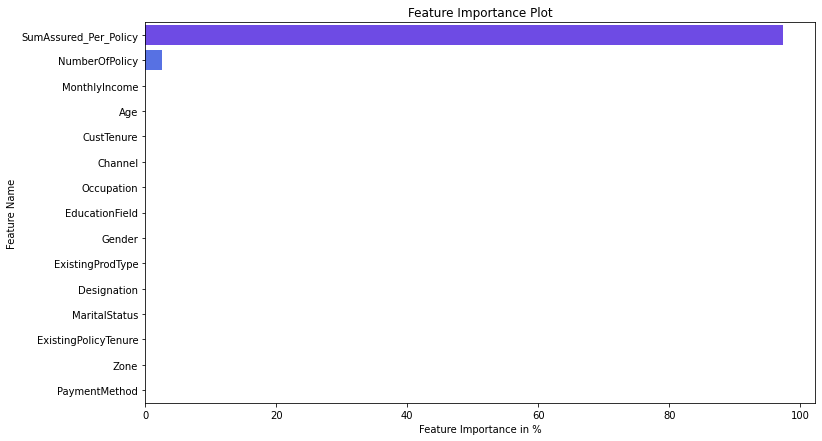

In [219]:
##Print Feature Importances
x=pd.DataFrame(best_grid_dtree.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [220]:
# prediction on training data
y_train_pred_Dtree_tunned_param=RF_model_tunned_param.predict(X_train)
# prediction on test data
y_test_pred_Dtree_tunned_param=RF_model_tunned_param.predict(X_test)

# The MAE ( Mean asbsolute error)
print('The MAE is:', mean_absolute_error(y_train,y_train_pred_Dtree_tunned_param))
decission_tree_tunned_param_train_MAE=mean_absolute_error(y_train,y_train_pred_Dtree_tunned_param)
# The MSE ( Mean Squared Error)
print('The MSE is:', mean_squared_error(y_train,y_train_pred_Dtree_tunned_param))
decission_tree_tunned_param_train_MSE=mean_squared_error(y_train,y_train_pred_Dtree_tunned_param)
# The MAPE ( Mean Absolute Percentage Error)
print( 'The MAPE is', mean_absolute_percentage_error(y_train,y_train_pred_Dtree_tunned_param))
decission_tree_tunned_param_train_MAPE=mean_absolute_percentage_error(y_train,y_train_pred_Dtree_tunned_param)
# The EVS (Expalained Variance Score)
print('The EVS is', explained_variance_score(y_train,y_train_pred_Dtree_tunned_param))
decission_tree_tunned_param_train_EVS=explained_variance_score(y_train,y_train_pred_Dtree_tunned_param)
# The RMSE
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(y_train,y_train_pred_Dtree_tunned_param)))
decission_tree_tunned_param_train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pred_Dtree_tunned_param))


# The MAE ( Mean asbsolute error)
print('The MAE for Test data is:', mean_absolute_error(y_test, y_test_pred_Dtree_tunned_param))
decission_tree_tunned_param_test_MAE=mean_absolute_error(y_test, y_test_pred_Dtree_tunned_param)
# The MSE ( Mean Squared Error)
print('The MSE for Test data is:', mean_squared_error(y_test, y_test_pred_Dtree_tunned_param))
decission_tree_tunned_param_test_MSE=mean_squared_error(y_test, y_test_pred_Dtree_tunned_param)
# The MAPE ( Mean Absolute Percentage Error)
print('The MAPE for Test data is', mean_absolute_percentage_error(y_test, y_test_pred_Dtree_tunned_param))
decission_tree_tunned_param_test_MAPE=mean_absolute_percentage_error(y_test, y_test_pred_Dtree_tunned_param)
# The EVS (Expalained Variance Score)
print('The EVS for Test data is', explained_variance_score(y_test, y_test_pred_Dtree_tunned_param))
decission_tree_tunned_param_test_EVS=explained_variance_score(y_test, y_test_pred_Dtree_tunned_param)
# The RMSE
print('The RMSE is:%.2f'% np.sqrt(mean_squared_error(y_test, y_test_pred_Dtree_tunned_param)))
decission_tree_tunned_param_test_rmse=np.sqrt(mean_squared_error(y_test, y_test_pred_Dtree_tunned_param))

The MAE is: 199.28413409118212
The MSE is: 109990.86396354134
The MAPE is 0.14767656097815846
The EVS is 0.8982721849779248
The RMSE is:331.65
The MAE for Test data is: 211.17181273772886
The MSE for Test data is: 108965.47420328196
The MAPE for Test data is 0.1564641747663458
The EVS for Test data is 0.8875324431646422
The RMSE is:330.10


In [221]:
data2= pd.DataFrame({
        'decission_tree tunned param':[decission_tree_tunned_param_train_rmse,decission_tree_tunned_param_test_rmse, decission_tree_tunned_param_train_MAE, decission_tree_tunned_param_test_MAE,
                             decission_tree_tunned_param_train_MSE, decission_tree_tunned_param_test_MSE, decission_tree_tunned_param_train_MAPE, decission_tree_tunned_param_test_MAPE,
                             decission_tree_tunned_param_train_EVS, decission_tree_tunned_param_test_EVS],
        },index=index)

final_result=pd.concat([final_result,data2],axis=1)
final_result.T


,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MSE,Test MSE,Train MAPE,Test MAPE,Train EVS,Test EVS
Linear Regression,317.48346,316.634998,220.321007,222.51949,100795.74739,100257.72178,0.170724,0.171265,0.906776,0.896495
Stats Model 1,317.48346002535055,316.63499771886285,220.321007,222.51949,100795.74739,100257.72178,0.170724,0.171265,0.906776,0.896495
Stats Model 2,354.54396801961036,353.56277958413546,238.541875,244.141863,125701.425259,125006.639107,0.175574,0.179678,0.883742,0.870965
Stats Model 3,354.5472293235076,353.5568690941128,238.571656,244.150994,125703.737821,125002.459684,0.175633,0.179681,0.88374,0.87097
Stats Model 4,354.57408724890837,353.35723000116565,238.559194,244.031095,125722.783348,124861.331994,0.175619,0.17965,0.883722,0.871115
Stats Model 5,354.6259691021416,353.20780003269664,238.722552,243.744927,125759.577962,124755.750004,0.175782,0.179249,0.883688,0.871228
Stats Model 6,354.6848065841537,353.0174978354055,238.752834,243.6696,125801.312022,124621.353778,0.17576,0.179242,0.883649,0.871367
Stats Model 7,354.7636336409267,352.8757950057764,238.73769,243.744927,125857.235754,124521.326701,0.175744,0.179435,0.883598,0.871469
Stats Model 8,354.8816410065518,352.68578464437667,238.760798,243.458747,125940.979124,124387.26269,0.175876,0.179265,0.88352,0.871611
Stats Model 9,355.0675639410347,352.60212402026525,238.687196,243.298407,126072.974963,124328.257864,0.175543,0.178756,0.883398,0.871676


### Compare these models and select the best one with appropriate reasoning.

In [222]:
All_Model_result= final_result.T

In [223]:
All_Model_result['Test RMSE']= All_Model_result['Test RMSE'].astype('float')
All_Model_result['Train RMSE']= All_Model_result['Train RMSE'].astype('float')

In [224]:
All_Model_result.sort_values(by='Test RMSE')

,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MSE,Test MSE,Train MAPE,Test MAPE,Train EVS,Test EVS
Random Forest Bagging Model,157.545892,269.293587,106.47556,180.502449,24820.707968,72519.036197,0.076903,0.129404,0.977046,0.925137
Random Forest Tunned Param,157.545892,269.293587,106.47556,180.502449,24820.707968,72519.036197,0.076903,0.129404,0.977046,0.925137
Random Forest,101.955542,270.907949,65.695396,178.33923,10394.932541,73391.11693,0.047686,0.128212,0.990386,0.924232
Linear Regression,317.483460,316.634998,220.321007,222.51949,100795.74739,100257.72178,0.170724,0.171265,0.906776,0.896495
Stats Model 1,317.483460,316.634998,220.321007,222.51949,100795.74739,100257.72178,0.170724,0.171265,0.906776,0.896495
decission_tree tunned param,331.648706,330.099188,199.284134,211.171813,109990.863964,108965.474203,0.147677,0.156464,0.898272,0.887532
Stats Model 9,355.067564,352.602124,238.687196,243.298407,126072.974963,124328.257864,0.175543,0.178756,0.883398,0.871676
Stats Model 8,354.881641,352.685785,238.760798,243.458747,125940.979124,124387.26269,0.175876,0.179265,0.88352,0.871611
Stats Model 7,354.763634,352.875795,238.73769,243.744927,125857.235754,124521.326701,0.175744,0.179435,0.883598,0.871469
Stats Model 6,354.684807,353.017498,238.752834,243.6696,125801.312022,124621.353778,0.17576,0.179242,0.883649,0.871367


In [225]:
All_Model_result.sort_values(by='Test MAPE')

,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MSE,Test MSE,Train MAPE,Test MAPE,Train EVS,Test EVS
Random Forest,101.955542,270.907949,65.695396,178.33923,10394.932541,73391.11693,0.047686,0.128212,0.990386,0.924232
Random Forest Bagging Model,157.545892,269.293587,106.47556,180.502449,24820.707968,72519.036197,0.076903,0.129404,0.977046,0.925137
Random Forest Tunned Param,157.545892,269.293587,106.47556,180.502449,24820.707968,72519.036197,0.076903,0.129404,0.977046,0.925137
decission_tree tunned param,331.648706,330.099188,199.284134,211.171813,109990.863964,108965.474203,0.147677,0.156464,0.898272,0.887532
Stats Model 1,317.483460,316.634998,220.321007,222.51949,100795.74739,100257.72178,0.170724,0.171265,0.906776,0.896495
Linear Regression,317.483460,316.634998,220.321007,222.51949,100795.74739,100257.72178,0.170724,0.171265,0.906776,0.896495
Decision Tree,0.000000,381.056469,0.0,244.619285,0.0,145204.03251,0.0,0.175082,1.0,0.850288
Stats Model 9,355.067564,352.602124,238.687196,243.298407,126072.974963,124328.257864,0.175543,0.178756,0.883398,0.871676
Stats Model 6,354.684807,353.017498,238.752834,243.6696,125801.312022,124621.353778,0.17576,0.179242,0.883649,0.871367
Stats Model 5,354.625969,353.207800,238.722552,243.744927,125759.577962,124755.750004,0.175782,0.179249,0.883688,0.871228


In [226]:
my_result=All_Model_result.copy()

In [227]:
my_result['Model_name']=my_result.index

In [228]:
my_result

,Train RMSE,Test RMSE,Train MAE,Test MAE,Train MSE,Test MSE,Train MAPE,Test MAPE,Train EVS,Test EVS,Model_name
Linear Regression,317.483460,316.634998,220.321007,222.51949,100795.74739,100257.72178,0.170724,0.171265,0.906776,0.896495,Linear Regression
Stats Model 1,317.483460,316.634998,220.321007,222.51949,100795.74739,100257.72178,0.170724,0.171265,0.906776,0.896495,Stats Model 1
Stats Model 2,354.543968,353.562780,238.541875,244.141863,125701.425259,125006.639107,0.175574,0.179678,0.883742,0.870965,Stats Model 2
Stats Model 3,354.547229,353.556869,238.571656,244.150994,125703.737821,125002.459684,0.175633,0.179681,0.88374,0.87097,Stats Model 3
Stats Model 4,354.574087,353.357230,238.559194,244.031095,125722.783348,124861.331994,0.175619,0.17965,0.883722,0.871115,Stats Model 4
Stats Model 5,354.625969,353.207800,238.722552,243.744927,125759.577962,124755.750004,0.175782,0.179249,0.883688,0.871228,Stats Model 5
Stats Model 6,354.684807,353.017498,238.752834,243.6696,125801.312022,124621.353778,0.17576,0.179242,0.883649,0.871367,Stats Model 6
Stats Model 7,354.763634,352.875795,238.73769,243.744927,125857.235754,124521.326701,0.175744,0.179435,0.883598,0.871469,Stats Model 7
Stats Model 8,354.881641,352.685785,238.760798,243.458747,125940.979124,124387.26269,0.175876,0.179265,0.88352,0.871611,Stats Model 8
Stats Model 9,355.067564,352.602124,238.687196,243.298407,126072.974963,124328.257864,0.175543,0.178756,0.883398,0.871676,Stats Model 9


<AxesSubplot:xlabel='Model_name', ylabel='Test RMSE'>

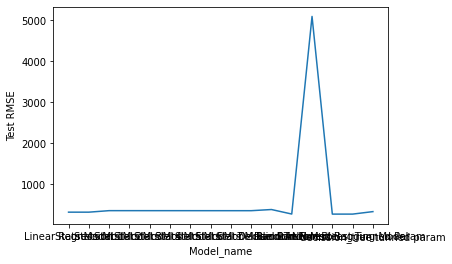

In [229]:
my_result=All_Model_result.copy()
my_result['Model_name']=my_result.index
my_result
sns.lineplot(data=my_result, x="Model_name", y=("Test RMSE"))